# **Proyecto de DS-II comisión 6115**

Buen día profesor **Juan**, **Diego** y **Carlos**.
Daré inicio a la entrega final proyecto con la siguiente duda...

# 1 Abstrato con motivación

# ¿Cuáles son las variables o combinaciones de variables que mejor predicen si un solicitante será aprobado o rechazado para una tarjeta de crédito?

**Aclaraciones:** El presente proyecto no contempla la utilización de APIs para la adquisición de datos. El dataset requerido para el análisis ha sido previamente almacenado en un repositorio de GitHub, desde donde se llevará a cabo su carga directa
El dataset nos permitirá analizar los factores cruciales que influyen en la decisión de otorgar o no una tarjeta de crédito a un individuo.

# Contexto (Premisa)...

El análisis de datos se ha convertido en una herramienta esencial para la toma de decisiones informadas en el sector financiero. En particular, la evaluación de solicitudes de tarjetas de crédito implica considerar una variedad de factores que pueden influir en la elegibilidad de un individuo. Este proyecto se centra en explorar un conjunto de datos que contiene información relevante sobre solicitantes de tarjetas de crédito, con el objetivo de identificar los principales factores de aprobación y comprender las relaciones entre las diferentes variables y la decisión final.

# 1.1 Quien es nuestra audiencia?

Este análisis está dirigido a profesionales del sector financiero, comprender los factores clave que influyen en la aprobación de tarjetas de crédito servirá a:
Instituciones financieras: Optimizar sus criterios de aprobación de tarjetas de crédito, mejorar la segmentación de clientes y personalizar las ofertas de productos.
Analistas de crédito: Tomar decisiones más informadas y objetivas al evaluar las solicitudes de tarjetas de crédito.
Científicos de datos: Explorar diferentes técnicas de análisis y modelado para predecir la elegibilidad de tarjetas de crédito y desarrollar soluciones innovadoras en el ámbito del riesgo crediticio.

# 1.2 Que buscamos plantear?

Se espera que este análisis revele los factores más influyentes en la decisión de aprobación de tarjetas de crédito, así como posibles patrones y segmentos de clientes con diferentes perfiles. Estos hallazgos pueden ser utilizados para mejorar los procesos de evaluación de crédito, personalizar las ofertas de productos y tomar decisiones más informadas en el ámbito del riesgo crediticio.
Iniciemos con la carga y mostrando las distintas columnas **(Metadata)**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del dataset
url = "https://raw.githubusercontent.com/Jartorias/DSII_61115_Coderhouse/main/credit_card_eligibility.csv"

# Cargar el dataset usando pandas
df = pd.read_csv(url, delimiter=",", encoding="ISO-8859-1")

# Mostrar las primeras filas del dataset
df.head()


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


# 2 Preguntas de Negocio Clave:

* ¿Cuáles son los factores demográficos (edad, género, estado civil, etc.) que más influyen en la elegibilidad para una tarjeta de crédito?

* ¿Existe una relación entre el nivel de ingresos, el tipo de ingreso y la ocupación de un individuo y su elegibilidad para una tarjeta de crédito?

* ¿El historial crediticio, como la duración de la cuenta bancaria y los años de empleo, son factores importantes para la aprobación de la tarjeta?

* ¿La posesión de bienes, como un automóvil o una propiedad, afecta la probabilidad de ser aprobado para una tarjeta de crédito?

* ¿Podemos identificar segmentos específicos de clientes que tienen más probabilidades de ser aprobados o rechazados?


# 2.1 A partir de las preguntas formularé distintas hipótesis o problemas a explorar:

**Factores Demográficos y Elegibilidad:**

H1: Los solicitantes con mayor edad y un estado civil de "casado" tendrán una mayor probabilidad de ser aprobados para una tarjeta de crédito, debido a una presunta mayor estabilidad financiera y responsabilidad.

H2: El género no tendrá un impacto significativo en la elegibilidad para una tarjeta de crédito, ya que las instituciones financieras deberían basar sus decisiones en factores económicos y no en discriminación de género.

**Ingresos, Ocupación y Elegibilidad:**

H3: Los solicitantes con mayores ingresos y una ocupación que permita un ingreso estable (como "empleado" o "funcionario") tendrán una mayor probabilidad de ser aprobados.

H4: Ciertas ocupaciones, particularmente aquellas asociadas con mayor estabilidad laboral y salarios más altos, estarán relacionadas con una mayor probabilidad de aprobación.

**Historial Crediticio y Elegibilidad:**

H5: La duración de la cuenta bancaria y los años de empleo tendrán una correlación positiva con la elegibilidad para una tarjeta de crédito, reflejando una mayor estabilidad financiera y menor riesgo de incumplimiento.
Posesión de Bienes y Elegibilidad:

H6: La posesión de un automóvil o una propiedad aumentará la probabilidad de aprobación, ya que indica una mayor capacidad financiera y compromiso con el pago de deudas.

**Segmentación de Clientes:**

H7: Será posible identificar segmentos de clientes con diferentes perfiles de riesgo, basados en combinaciones de variables demográficas, financieras y de comportamiento.

##3 Análisis exploratorio (EDA)

Para comprender mejor los factores que influyen en la elegibilidad para una tarjeta de crédito, iniciaremos identificando unos datos básicos.

Primer Vistazo a los Datos

Comenzaremos visualizando las primeras filas del dataset. Esto nos permitirá familiarizarnos con la estructura de los datos, identificar los tipos de variables presentes y obtener una primera impresión de su distribución.

Exploración de Variables y su Relación con la Elegibilidad

Posteriormente, profundizaremos en el análisis para determinar qué factores tienen el mayor impacto en la aprobación de una tarjeta de crédito. Utilizaremos técnicas de visualización y estadística descriptiva para examinar las relaciones entre las distintas variables y la variable clave dentro del dataset **objetivo** (Target).


In [2]:
# Mostrar las primeras filas del dataset
df.head()

# Información general del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


# 3.1 Conjunto de Datos 'Metadatos' (EDA)
**Variables:**

ID: Identificador único del cliente. **Variable numérica**

Gender: Género del solicitante (0: Hombre, 1: Mujer). **Variable Binaria**

Own_car: Indicador de posesión de automóvil (0: No, 1: Sí). **Variable Binaria**

Own_property: Indicador de posesión de propiedad (0: No, 1: Sí). **Variable Binaria**

Work_phone: Indicador de posesión de teléfono laboral (0: No, 1: Sí). **Variable Binaria**

Phone: Indicador de posesión de teléfono personal (0: No, 1: Sí). **Variable Binaria**

Email: Indicador de si se proporcionó un correo electrónico (0: No, 1: Sí). **Variable Binaria**

Unemployed: Indicador de desempleo (0: No, 1: Sí). **Variable Binaria**

Num_children: Número de hijos del solicitante. **Variable numérica**

Num_family: Número total de miembros en la familia del solicitante. **Variable numérica**

Account_length: Tiempo que el solicitante ha tenido una cuenta bancaria (en años). **Variable numérica**

Total_income: Ingreso total anual del solicitante. **Variable numérica**

Age: Edad del solicitante (en años).**Variable numérica**

Years_employed: Años de empleo del solicitante. **Variable numérica**

Income_type: Categoría del tipo de ingreso del solicitante. **Variable Categórica**

Education_type: Nivel educativo del solicitante. **Variable Categórica**

Family_status: Estado civil del solicitante. **Variable Categórica**

Housing_type: Tipo de vivienda del solicitante. **Variable Categórica**

Occupation_type: Ocupación del solicitante. **Variable Categórica**

Target: Variable objetivo binaria (0: No elegible, 1: Elegible para tarjeta de crédito). **Variable Binaria**

Análisis Exploratorio Inicial

Para comenzar, realizaremos un análisis descriptivo de las variables **categóricas**, examinando la frecuencia de cada categoría para comprender su distribución en el conjunto de datos.

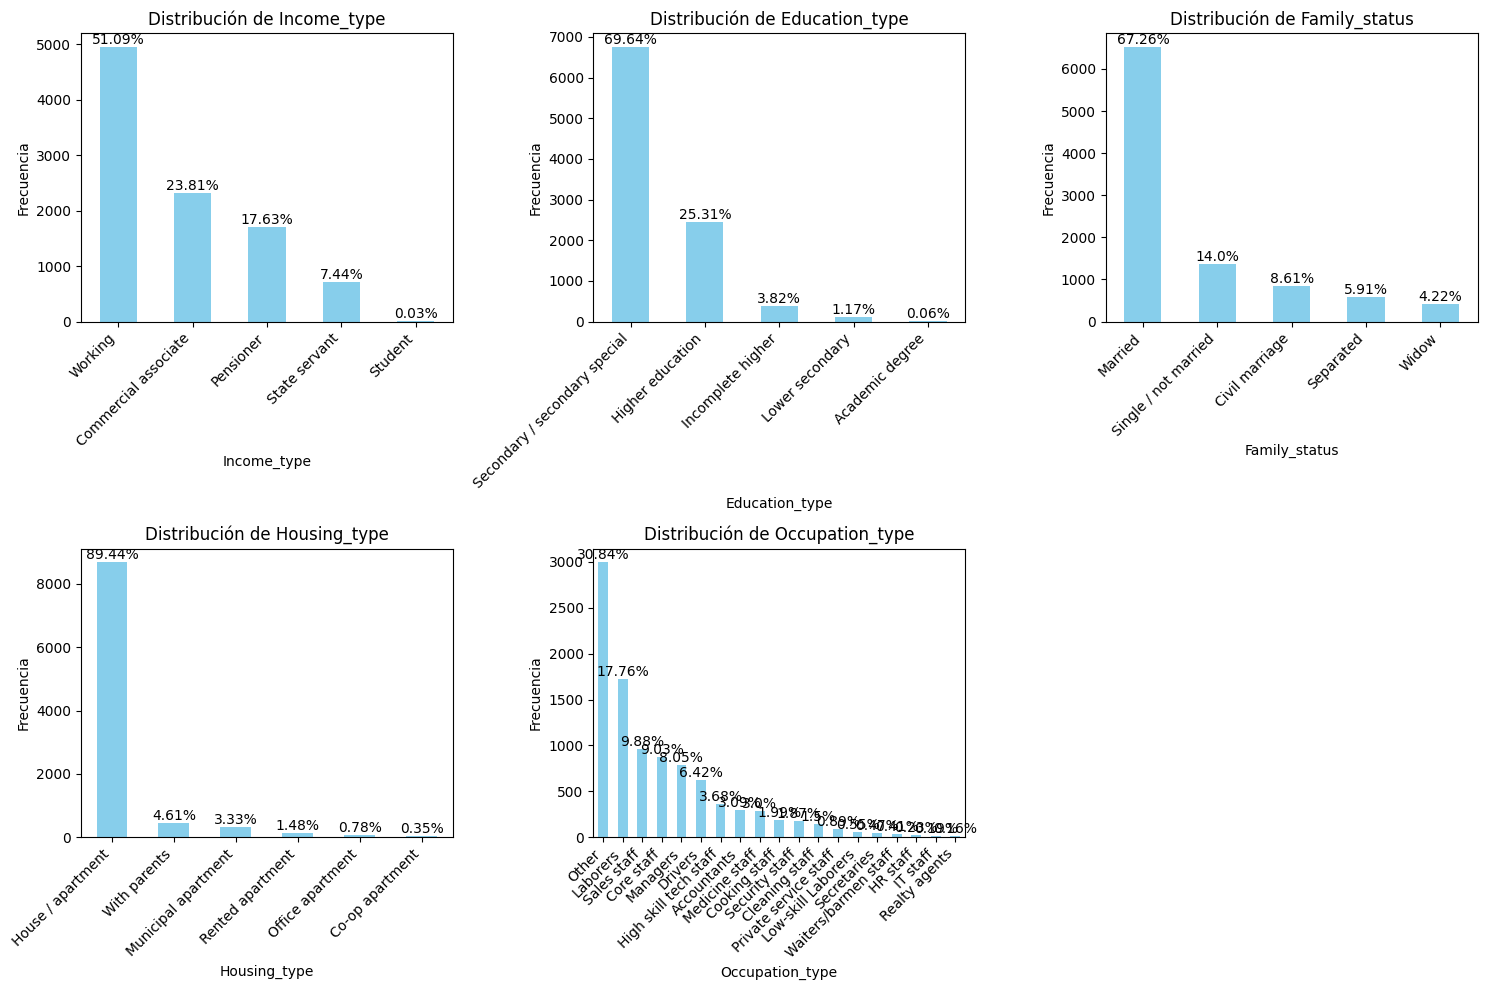

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de variables categóricas seleccionadas
categorical_variables = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Definir el número de columnas y filas para la cuadrícula de subplots
num_cols = 3
num_rows = int(np.ceil(len(categorical_variables) / num_cols))

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurarse de que `axes` sea un array 2D, incluso si solo hay una fila o columna
axes = np.atleast_2d(axes)

# Iterar sobre las variables categóricas seleccionadas y crear los gráficos de barras
for i, column in enumerate(categorical_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Calcular los recuentos de valores y los porcentajes
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    percentages = ((value_counts / total_count) * 100).round(2)

    # Crear el gráfico de barras con porcentajes
    value_counts.plot(kind='bar', ax=ax, color='skyblue')

    # Agregar etiquetas de porcentaje a las barras usando .iloc[]
    for j, v in enumerate(value_counts):
        ax.text(j, v, f'{percentages.iloc[j]}%', ha='center', va='bottom')  # Cambiado a .iloc[]

    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

    # Rotar las etiquetas del eje x si es necesario
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Ocultar cualquier eje vacío si hay menos variables que espacios en la cuadrícula
for i in range(len(categorical_variables), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

# 3.2 Análisis de los metadatos "Distribución de Variables Categóricas"(EDA)

La **frecuencia** de cada categoría en las variables Income_type, Education_type, Family_status, Housing_type y Occupation_type nos brinda una visión inicial de la composición de nuestro dataset. Al examinar estas distribuciones, podemos empezar a entender qué factores podrían ser relevantes en la evaluación de solicitudes de tarjetas de crédito en el contexto del sector bancario.

Insights Preliminares:

Income_type: La categoría "Working" es la más frecuente, lo que sugiere que la mayoría de los solicitantes tienen ingresos provenientes de un empleo.

Education_type: La categoría "Secondary / secondary special" es la más común, indicando que un gran número de solicitantes tienen un nivel de educación secundaria o técnica.

Family_status: "Married" es el estado civil predominante en el dataset.

Housing_type: La mayoría de los solicitantes viven en una "House / apartment".

Occupation_type: "Laborers" es la ocupación más frecuente, seguida de "Core staff".


#Proseguiremos con el análisis de las **variables binarias**

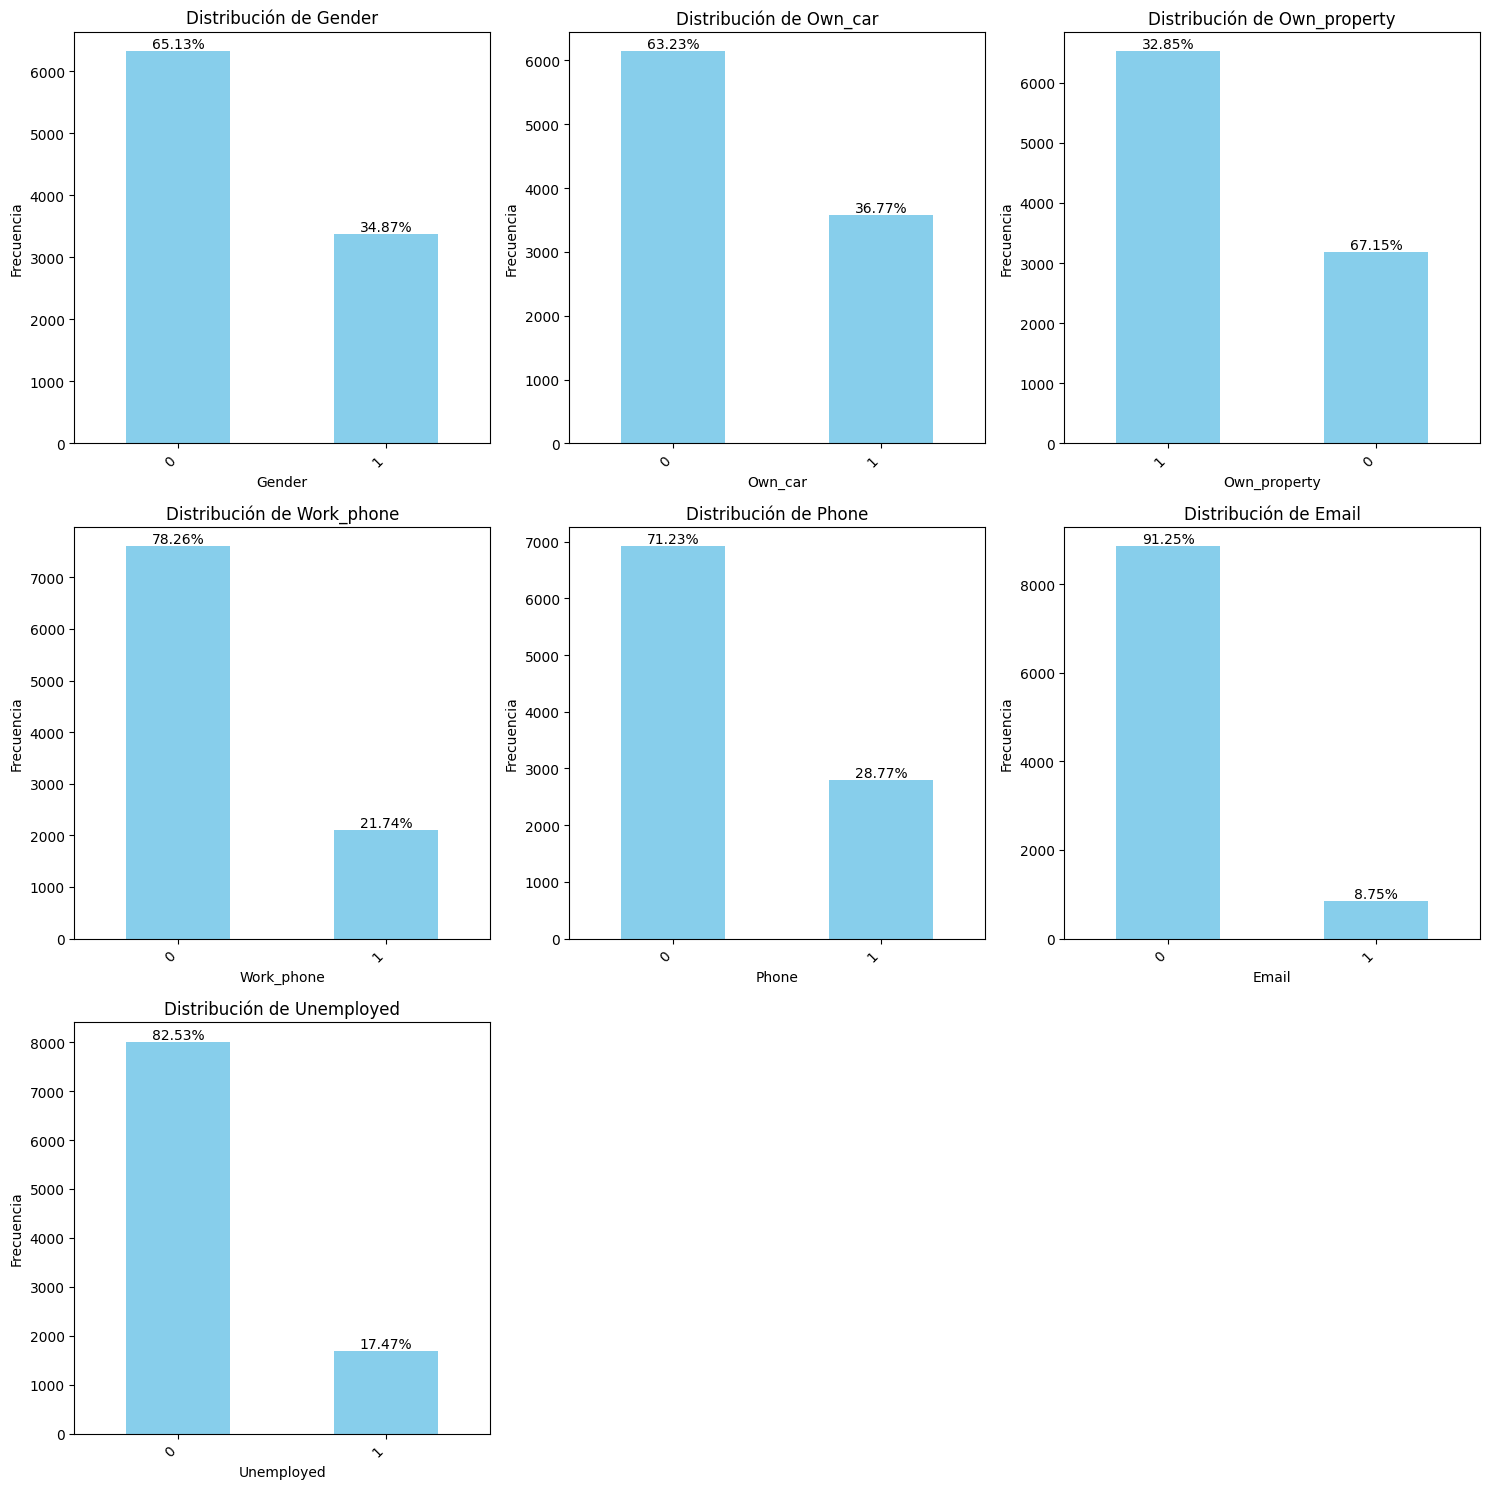

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de variables binarias seleccionadas
binary_variables = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']

# Definir el número de columnas y filas para la cuadrícula de subplots
num_cols = 3
num_rows = int(np.ceil(len(binary_variables) / num_cols))

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurarse de que `axes` sea un array 2D, incluso si solo hay una fila o columna
axes = np.atleast_2d(axes)

# Iterar sobre las variables binarias seleccionadas y crear los gráficos de barras
for i, column in enumerate(binary_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Calcular los recuentos de valores y los porcentajes
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    percentages = ((value_counts / total_count) * 100).round(2)

    # Crear el gráfico de barras con porcentajes
    value_counts.plot(kind='bar', ax=ax, color='skyblue')

    # Agregar etiquetas de porcentaje a las barras
    for j, v in enumerate(value_counts):
        ax.text(j, v, f'{percentages[j]}%', ha='center', va='bottom')

    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

    # Rotar las etiquetas del eje x si es necesario
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Ocultar cualquier eje vacío si hay menos variables que espacios en la cuadrícula
for i in range(len(binary_variables), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


# 3.3 Análisis de los metadatos "Distribución de Variables Binarias" (EDA)

Los gráficos presentados muestran la distribución de **frecuencia** de siete variables binarias en nuestro dataset: Gender, Own_Car, Own_property Work_phone, Phone, Email y Unemployed.

Estas variables nos brindan información sobre aspectos de contacto y situación laboral de los solicitantes, lo cual puede ser relevante en la evaluación de su elegibilidad para una tarjeta de crédito.

Insights Preliminares:

Gender: La mayoría de los solicitantes son hombres (65.13%), donde 0 representa "Hombre" y 1 representa "Mujer".
Esto podría indicar un sesgo en la muestra de datos o reflejar una mayor participación de hombres en el proceso de solicitud de tarjetas de crédito en el contexto estudiado.

Own_car: La mayoría de los solicitantes no posee un automóvil (63.23%).
Esto podría sugerir que la posesión de un automóvil no es un requisito común para la aprobación de tarjetas de crédito o que la población estudiada tiene un menor acceso a la propiedad de vehículos.

Own_property: La mayoría de los solicitantes posee una propiedad (67.15%).
Esto podría ser interpretado como un indicador positivo de estabilidad financiera y, potencialmente, un factor favorable en la evaluación crediticia.
Work_phone, Phone, Email:

Las observaciones para estas variables son consistentes con el análisis anterior.
La mayoría de los solicitantes no tienen un teléfono del trabajo (78.26%), pero sí tienen un teléfono personal (71.23%) y han proporcionado una dirección de correo electrónico (91.25%).

Unemployed: La mayoría de los solicitantes (82.53%) se encuentran empleados. Este es un indicador positivo desde la perspectiva de la evaluación crediticia, ya que sugiere una mayor estabilidad financiera y capacidad de pago.

#Proseguiremos con el análisis de las **variables numéricas**

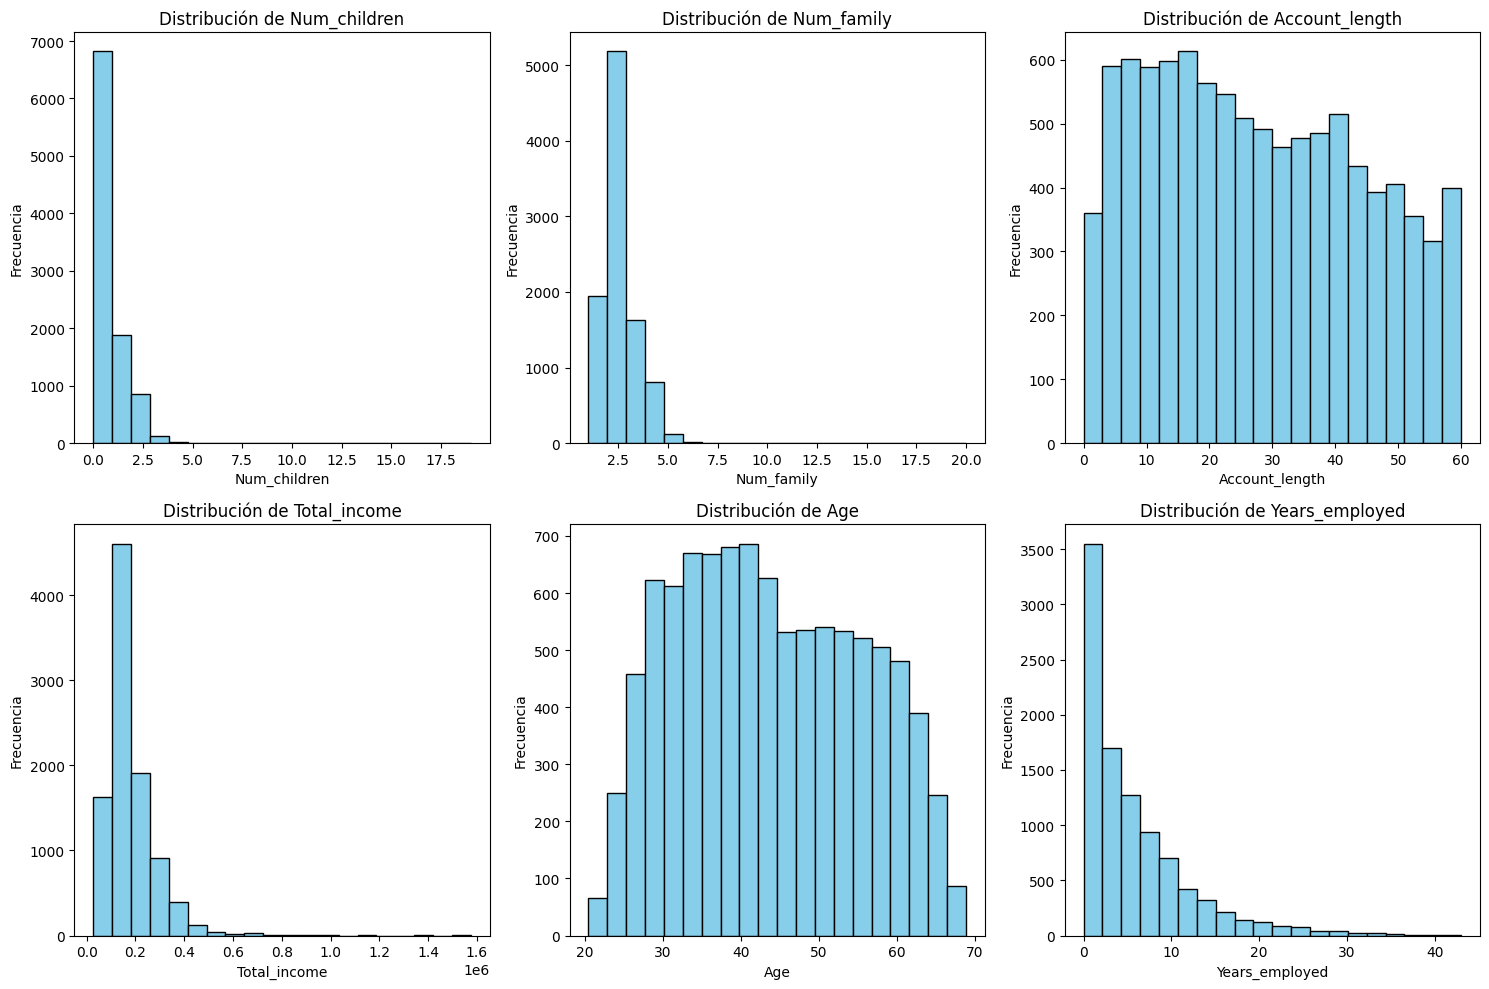

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de variables numéricas seleccionadas
numeric_variables = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']

# Definir el número de columnas y filas para la cuadrícula de subplots
num_cols = 3
num_rows = int(np.ceil(len(numeric_variables) / num_cols))

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurarse de que `axes` sea un array 2D, incluso si solo hay una fila o columna
axes = np.atleast_2d(axes)

# Iterar sobre las variables numéricas seleccionadas y crear los histogramas
for i, column in enumerate(numeric_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Crear el histograma para la variable numérica
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')

    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ocultar cualquier eje vacío si hay menos variables que espacios en la cuadrícula
for i in range(len(numeric_variables), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


# 3.4 Análisis de los metadatos "Distribución de Variables numéricas" (EDA)

Los gráficos presentados muestran la distribución de **frecuencia** de seis variables numéricas en nuestro dataset: Num_children, Num_family, Account_length, Total_income, Age, Years_employed.

Las variables numéricas, como la edad del solicitante (Age), el ingreso total (Total_income), los años de empleo (Years_employed) y la duración de la cuenta bancaria (Account_length), nos brindan información crucial sobre la población presente en el dataset. Estos factores, relacionados con la estabilidad financiera y la capacidad de pago, son altamente relevantes en la evaluación de la elegibilidad de un individuo para obtener una tarjeta de crédito.


Insights Preliminares:

Num_children: La mayoría de los solicitantes tienen 0 o 1 hijo. Esto sugiere que las familias pequeñas son más comunes en este conjunto de datos.

Num_family:  La mayoría de los solicitantes tienen familias pequeñas, con 2 o 3 miembros siendo lo más común. Esto refuerza la observación anterior sobre el tamaño de las familias.

Account_length: La distribución es bastante uniforme, con una ligera tendencia a tener más cuentas con mayor antigüedad. Esto podría indicar que un historial bancario más largo se considera favorable en la evaluación crediticia.

Total_income: La mayoría de los solicitantes tienen ingresos en el rango inferior, con algunos casos de ingresos muy altos. Esta distribución sesgada a la derecha es común en datos de ingresos y podría requerir transformaciones para algunos modelos.

Age: La distribución de edades es aproximadamente simétrica, con la mayoría de los solicitantes en un rango de edad media. La ligera disminución en las edades más avanzadas podría reflejar la demografía de la población solicitante o políticas crediticias que favorecen a personas más jóvenes.

Years_employed: La mayoría de los solicitantes tienen pocos años de empleo. Esto podría indicar una población relativamente joven o un mercado laboral con alta rotación. La estabilidad laboral, reflejada en un mayor número de años de empleo, podría ser un factor positivo en la evaluación crediticia.

Finalizaremos analizando de las dos últimas variables ID y Target, para lo cual la primera variable que es numérica nos permitirá saber la cantidad de solicitantes únicos y la segunda variable que es binaria siendo clave dentro del dataset **objetivo** nos mostrara la aprobaciones individuales de tarjeta de crédito.

Cantidad de solicitantes únicos: 9709


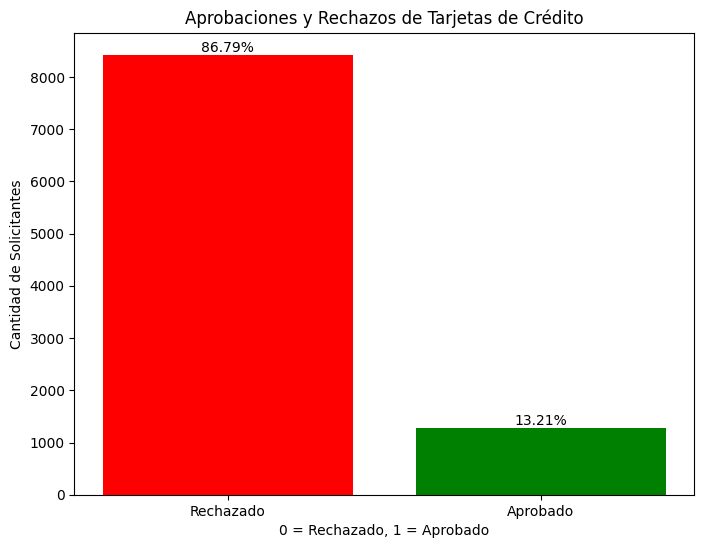

In [6]:
import matplotlib.pyplot as plt

# Contar la cantidad de solicitantes únicos
unique_ids = df['ID'].nunique()
print(f"Cantidad de solicitantes únicos: {unique_ids}")

# Contar la cantidad de aprobaciones y rechazos de tarjetas de crédito
target_counts = df['Target'].value_counts()
target_percentages = (target_counts / target_counts.sum()) * 100

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['red', 'green'])

# Etiquetas en el gráfico
for i, v in enumerate(target_counts):
    plt.text(i, v, f'{target_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Aprobaciones y Rechazos de Tarjetas de Crédito')
plt.xlabel('0 = Rechazado, 1 = Aprobado')
plt.ylabel('Cantidad de Solicitantes')
plt.xticks([0, 1], ['Rechazado', 'Aprobado'])

plt.show()


#Análisis de los metadatos "Distribución aprobados y rechazados" (EDA)

Insight Preliminar:

El gráfico muestra un desequilibrio significativo en la distribución de la variable Target. La gran mayoría de las solicitudes de tarjetas de crédito en el dataset fueron rechazadas (86.79%), mientras que solo un 13.21% fueron aprobadas.

#Comprobaremos algunas de las hipótesis planteadas al inicio del proyecto

H1: Los solicitantes con mayor edad y un estado civil de "casado" tendrán una mayor probabilidad de ser aprobados para una tarjeta de crédito, debido a una presunta mayor estabilidad financiera y responsabilidad.

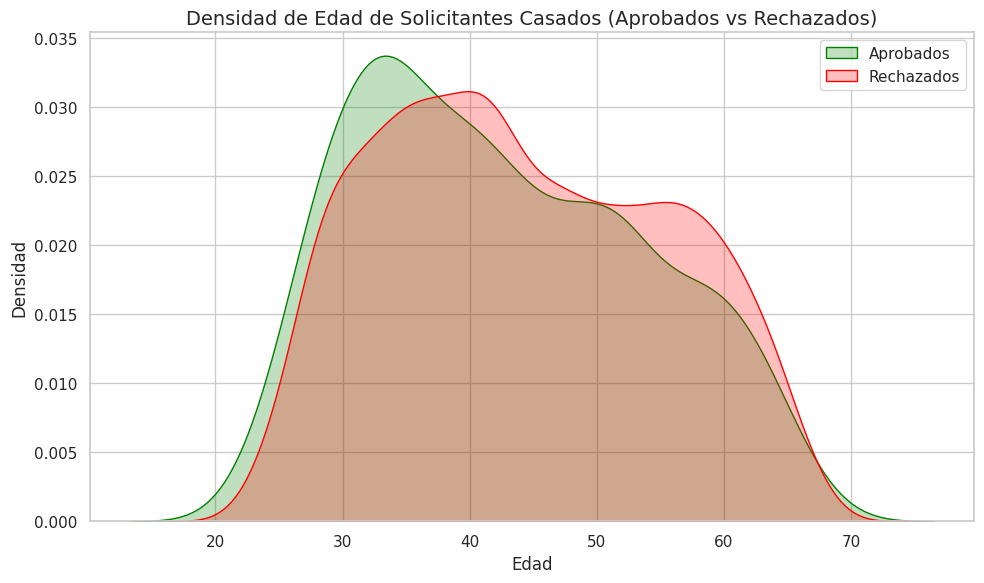

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo con fondo de líneas grises
sns.set(style="whitegrid")

# Filtrar por solicitantes casados
df_married = df[df['Family_status'] == 'Married']

# Crear el gráfico de densidad superpuesto con fill=True
plt.figure(figsize=(10, 6))
sns.kdeplot(df_married[df_married['Target'] == 1]['Age'], label='Aprobados', fill=True, color='green')
sns.kdeplot(df_married[df_married['Target'] == 0]['Age'], label='Rechazados', fill=True, color='red')

# Configurar el título y etiquetas
plt.title('Densidad de Edad de Solicitantes Casados (Aprobados vs Rechazados)', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Mostrar leyenda
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

#Insights del gráfico de densidad (EDA):

Distribución General: Ambas distribuciones (aprobados y rechazados) tienen una forma similar, con un pico alrededor de los 40 años, lo que sugiere que la mayoría de los solicitantes casados, tanto aprobados como rechazados, se encuentran en ese rango de edad.
Cola Derecha: La distribución de los solicitantes aprobados tiene una cola derecha ligeramente más larga que la de los rechazados. Esto puede indicar que, aunque la mayoría de las aprobaciones se concentran en edades medias, hay una proporción algo mayor de solicitantes de mayor edad que son aprobados en comparación con los rechazados.
Solapamiento: Existe un solapamiento considerable entre ambas distribuciones, lo que significa que la edad por sí sola no es un factor determinante para la aprobación de la tarjeta de crédito en el caso de los solicitantes casados.

**Conclusión de la Hipótesis H1 "Los solicitantes con mayor edad y un estado civil de "casado" pueden tener una mayor probabilidad de ser aprobados para una tarjeta de crédito, debido a una presunta mayor estabilidad financiera y responsabilidad.":**

Edad: El gráfico proporciona cierto apoyo a la primera parte de la hipótesis H1, que sugiere que los solicitantes con mayor edad y casados tienen una mayor probabilidad de ser aprobados. La cola derecha más larga en la distribución de los aprobados indica que hay una tendencia, aunque no muy pronunciada, a aprobar a solicitantes casados de mayor edad.
La edad parece jugar un papel en la aprobación de tarjetas de crédito para solicitantes casados, pero no es el único factor determinante.

Para evaluar completamente la hipótesis H1, sería necesario realizar análisis adicionales que comparen las tasas de aprobación entre diferentes estados civiles y exploren la interacción **entre la edad y el estado civil en la aprobación…**

H2: El género no tendrá un impacto significativo en la elegibilidad para una tarjeta de crédito, ya que las instituciones financieras deberían basar sus decisiones en factores económicos y no en discriminación de género.

Ingresos, Ocupación (usaremos las 6 profesiones con más personas listadas según la frecuencia mostrada en la metadata:


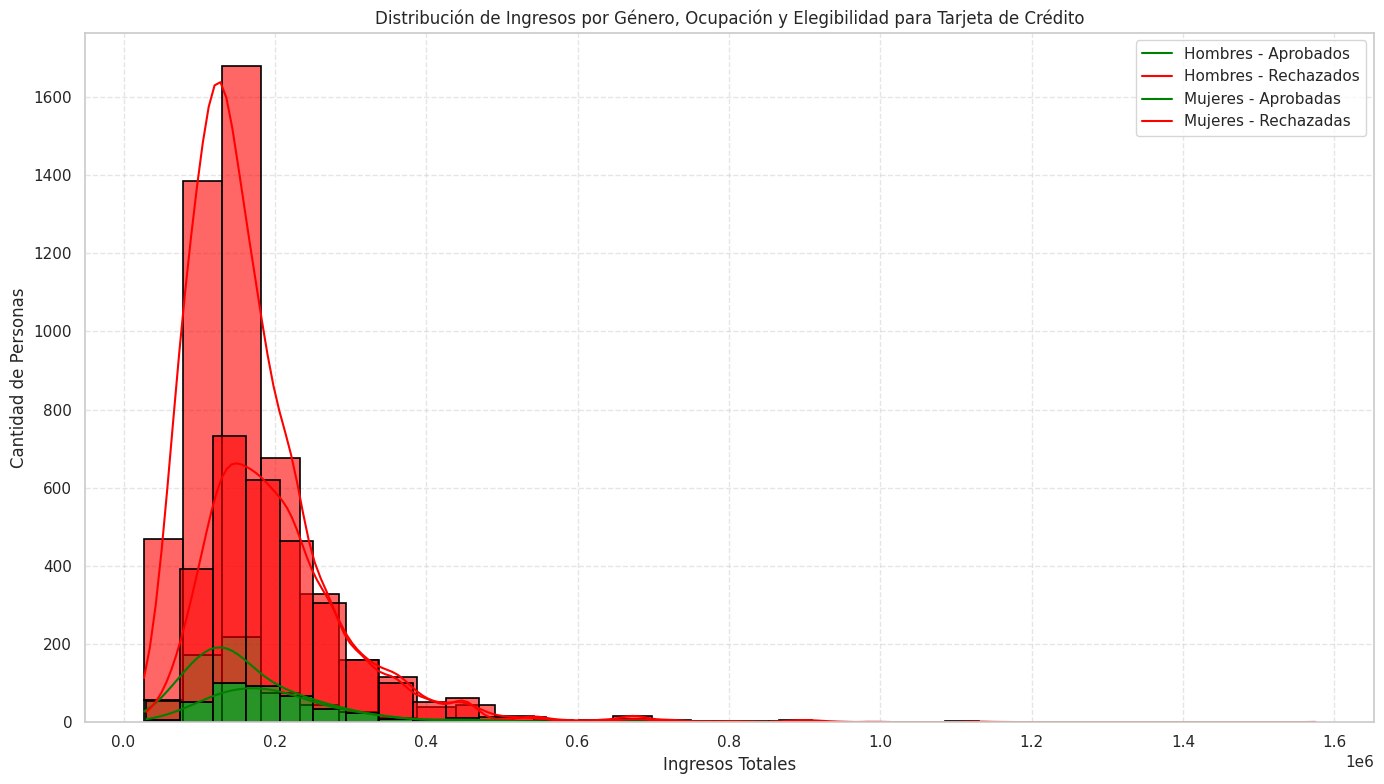

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustamos el género (0: Hombre, 1: Mujer)
df['Gender'] = df['Gender'].replace({0: 'Hombre', 1: 'Mujer'})

# Filtramos las 6 mayores ocupaciones
ocupaciones_mayores = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'Other']
df_ocupaciones = df[df['Occupation_type'].isin(ocupaciones_mayores)]

# Crear la figura
plt.figure(figsize=(14, 8))

# Histograma superpuesto para Hombres (Azul) y Mujeres (Rosado)
sns.histplot(data=df_ocupaciones[df_ocupaciones['Gender'] == 'Hombre'], x='Total_income', hue='Target',
             multiple='stack', palette={1: 'green', 0: 'red'}, kde=True, bins=30,
             edgecolor='black', linewidth=1.2, label='Hombres', color='blue', alpha=0.6)

sns.histplot(data=df_ocupaciones[df_ocupaciones['Gender'] == 'Mujer'], x='Total_income', hue='Target',
             multiple='stack', palette={1: 'green', 0: 'red'}, kde=True, bins=30,
             edgecolor='black', linewidth=1.2, label='Mujeres', color='pink', alpha=0.6)

# Personalización
plt.title('Distribución de Ingresos por Género, Ocupación y Elegibilidad para Tarjeta de Crédito')
plt.xlabel('Ingresos Totales')
plt.ylabel('Cantidad de Personas')

# Leyenda para aclarar lo que representa cada color
plt.legend(['Hombres - Aprobados', 'Hombres - Rechazados', 'Mujeres - Aprobadas', 'Mujeres - Rechazadas'], loc='upper right')

# Fondo de líneas grises claro
plt.grid(True, linestyle='--', alpha=0.5)

# Ajuste final
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#Insights del gráfico barras superpuestas (EDA):

Distribución general de ingresos: La distribución de ingresos totales para todos los grupos (hombres y mujeres, aprobados y rechazados) está sesgada a la derecha, lo que indica que la mayoría de los solicitantes tienen ingresos más bajos, con algunos individuos con ingresos significativamente más altos, vale aclarar que se tomaron las 6 ocupaciones con más personas dentro del dataset, lo que podría haber generado que no se tomara la población total con solicitudes aprobadas.

El gráfico proporciona evidencia que apoya la hipótesis H2. La similitud en las distribuciones de ingresos para hombres y mujeres aprobados sugiere que el género no es un factor determinante en la decisión de aprobación, al menos en lo que respecta al nivel de ingresos.

**Conclusión de la H2: "El género no tendrá un impacto significativo en la elegibilidad para una tarjeta de crédito, ya que las instituciones financieras deberían basar sus decisiones en factores económicos y no en discriminación de género."**

El ingreso parece ser un factor importante en la aprobación de tarjetas de crédito, independientemente del género.
Por otro lado el género, por sí solo, no parece tener un impacto significativo en la elegibilidad, lo que respalda la idea de que las decisiones de aprobación se basan principalmente en factores económicos.
El grafico nos es concluyente, se debe investigar otros factores que puedan explicar la diferencia en las tasas de rechazo o aprobación entre hombres y mujeres.

**Ahora evaluaremos la H2 con la variable *Gender* (Mujer y Hombre) como indicador…**


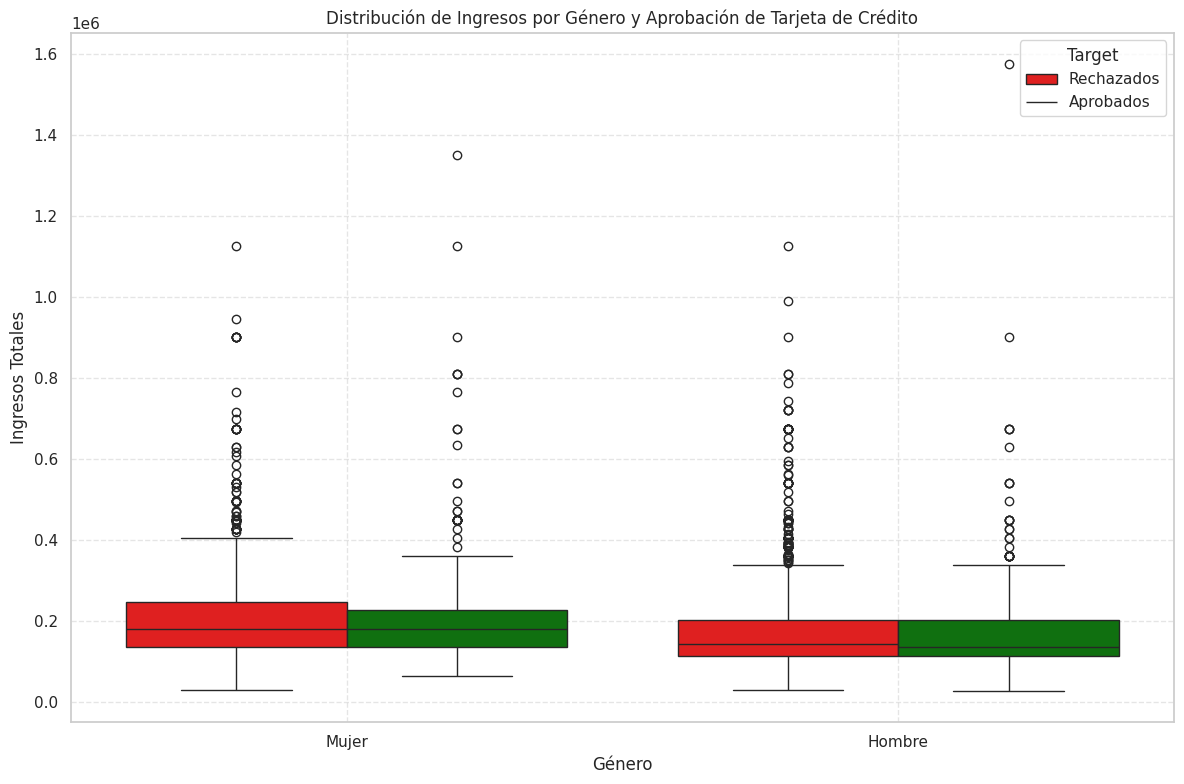

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustamos el género (0: Hombre, 1: Mujer)
df['Gender'] = df['Gender'].replace({0: 'Hombre', 1: 'Mujer'})

# Filtramos las 6 mayores ocupaciones
ocupaciones_mayores = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'Other']
df_ocupaciones = df[df['Occupation_type'].isin(ocupaciones_mayores)]

# Crear la figura
plt.figure(figsize=(12, 8))

# Crear el boxplot separando por género y coloreando por Target
sns.boxplot(x='Gender', y='Total_income', hue='Target', data=df_ocupaciones, palette={1: 'green', 0: 'red'})

# Personalización
plt.title('Distribución de Ingresos por Género y Aprobación de Tarjeta de Crédito')
plt.xlabel('Género')
plt.ylabel('Ingresos Totales')

# Fondo de líneas grises claro
plt.grid(True, linestyle='--', alpha=0.5)

# Leyenda
plt.legend(title='Target', loc='upper right', labels=['Rechazados', 'Aprobados'])

# Ajuste final
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Insights del gráfico del grafico BoxPlot (EDA):

Al realizar la separación propuesta encontramos...

**Ingresos y Género:**

Mediana similar entre géneros: La línea dentro de la caja (mediana) es prácticamente igual tanto para hombres como para mujeres, tanto en los aprobados como en los rechazados. Esto sugiere que el ingreso total, por sí solo, no muestra una diferencia significativa entre géneros en cuanto a la aprobación de tarjetas de crédito.
Mayor dispersión en hombres: La caja es más larga para los hombres, tanto aprobados como rechazados, lo que indica una mayor variabilidad en sus ingresos en comparación con las mujeres.
Outliers: Se observan valores atípicos en ambos géneros, especialmente en el grupo de hombres aprobados, lo que indica la presencia de algunos individuos con ingresos excepcionalmente altos.

**Género y Aprobación:**

Mayor número de aprobados entre hombres: La altura de las cajas azules (aprobados) es mayor en el grupo de hombres que en el de mujeres, lo que indica que hay una mayor cantidad de hombres aprobados que de mujeres.
Proporción de aprobados similar: A pesar de la diferencia en el número absoluto de aprobados, la proporción de solicitudes aprobadas (tamaño relativo de la caja azul en relación a la roja) parece ser similar entre hombres y mujeres. Esto sugiere que, aunque más hombres son aprobados en términos absolutos, la probabilidad de aprobación en relación al número de solicitantes de cada género podría ser similar.

**Segunda conclusión de la H2: "El género no tendrá un impacto significativo en la elegibilidad para una tarjeta de crédito, ya que las instituciones financieras deberían basar sus decisiones en factores económicos y no en discriminación de género."**

El gráfico respalda parcialmente la hipótesis. La similitud en las medianas de ingresos para hombres y mujeres, así como la proporción similar de aprobados en relación al número de solicitantes de cada género, sugiere que el género, por sí solo, no parece ser un factor determinante en la decisión de aprobación, al menos en relación con el nivel de ingresos.
Sin embargo, la mayor cantidad de hombres aprobados y la mayor dispersión en sus ingresos podrían indicar que otros factores, como los años que ha laborando, interactúan con el género y pueden influir en la decisión de aprobación.

Complementemos la hipótesis **H2**  sumando una hipótesis adicional **"H4: Ciertas ocupaciones, particularmente aquellas asociadas con mayor estabilidad laboral y salarios más altos, estarán relacionadas con una mayor probabilidad de aprobación."** Como indicamos en el final del punto anterior, observemos el comportamiento entre años laborados y el total de ingreso para los 6 cargos con mayor cantidad de personas dentro del data set representando un **81.98%** del total.


<ipython-input-10-e1e94d56700a>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [gender_counts.get(0, 0), gender_counts.get(1, 0)]  # Hombres: 0, Mujeres: 1
<ipython-input-10-e1e94d56700a>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [gender_counts.get(0, 0), gender_counts.get(1, 0)]  # Hombres: 0, Mujeres: 1
<ipython-input-10-e1e94d56700a>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [gender_coun

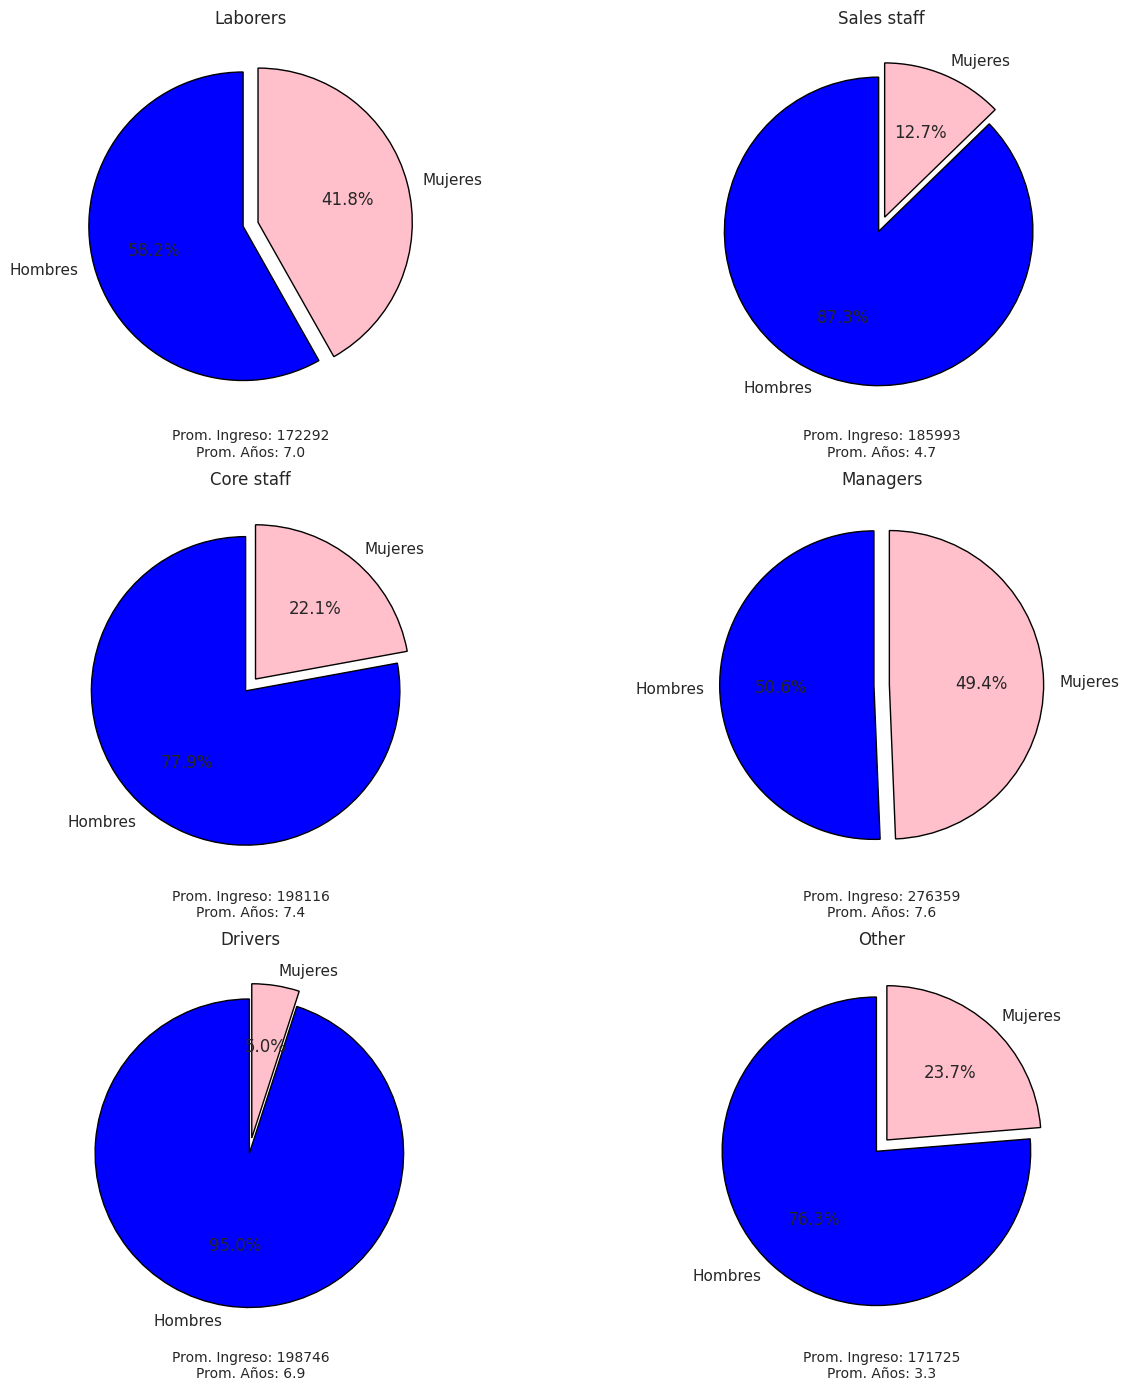

In [10]:
import matplotlib.pyplot as plt

# Filtrar las ocupaciones seleccionadas
ocupaciones_mayores = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'Other']
df_ocupaciones = df[df['Occupation_type'].isin(ocupaciones_mayores)]

# Agrupar por ocupación y género para calcular los promedios de ingreso y años empleados
grouped_data = df_ocupaciones.groupby(['Occupation_type', 'Gender']).agg({
    'Total_income': 'mean',
    'Years_employed': 'mean'
}).reset_index()

# Colores para hombres y mujeres
colors = {0: 'blue', 1: 'pink'}  # Azul para hombres, rosado para mujeres

# Crear la figura y los subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))  # 3 filas y 2 columnas de subplots
axes = axes.flatten()  # Aplanar la matriz de subplots para iterar fácilmente

# Iterar sobre cada tipo de ocupación
for i, ocupacion in enumerate(ocupaciones_mayores):
    ax = axes[i]

    # Filtrar los datos por ocupación
    data_ocupacion = grouped_data[grouped_data['Occupation_type'] == ocupacion]

    # Sumarize gender counts for the pie chart
    gender_counts = df_ocupaciones[df_ocupaciones['Occupation_type'] == ocupacion]['Gender'].value_counts()

    # Datos para las tortas
    labels = ['Hombres', 'Mujeres']
    sizes = [gender_counts.get(0, 0), gender_counts.get(1, 0)]  # Hombres: 0, Mujeres: 1
    explode = (0.05, 0.05)  # Separar ligeramente las secciones

    # Crear gráfico de torta
    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors[0], colors[1]],
        explode=explode,
        wedgeprops={'edgecolor': 'black'}
    )

    # Añadir el título de la ocupación
    ax.set_title(f'{ocupacion}')

    # Añadir texto con los promedios de ingreso y años empleados
    avg_income = data_ocupacion['Total_income'].mean()
    avg_years = data_ocupacion['Years_employed'].mean()
    ax.text(0, -1.5, f'Prom. Ingreso: {avg_income:.0f}\nProm. Años: {avg_years:.1f}', ha='center', fontsize=10)

# Ajuste final de la disposición
plt.tight_layout()
plt.show()

# Insights del Gráfico de Tortas "Distribución por Género, Ingreso y Años de Empleo en las 6 Ocupaciones con mayor población" (EDA)

**Distribución de Género por Ocupación:**

Predominancia Masculina: Observamos una clara predominancia masculina en las ocupaciones de "Sales Staff" (87.1%) y "Drivers" (95%), en menor medida, en "Sales Staff" (12.7%).
Predominancia Femenina: En contraste, las ocupaciones de "Sales Staff" (87.3%) y "Core Staff" (77.9%) son mayoritariamente femeninas.
Equilibrio Relativo: "Managers" muestran una distribución de género más equilibrada, aunque con una ligera mayoría de mujeres en "Managers" (50.6%).
"Other": Esta categoría, que agrupa diversas ocupaciones, muestra una predominancia femenina (76.3%).

*Ingresos y Ocupación:*
Relación entre ingresos y ocupación: La tendencia de ingresos más altos en ocupaciones como "Managers" y más bajos en "Laborers" y "Sales staff" se mantiene.

*Años de Empleo y Ocupación:*
Variabilidad entre ocupaciones: Los años de empleo promedio siguen variando entre ocupaciones. Sin embargo el promedio es de 7 años en "Core staff" "Managers", "Drivers" y Laborers, mientras que "Sales Staff" y "Others" muestran promedios más bajos.

**Conclusión adicional integrado H4: Ciertas ocupaciones, particularmente aquellas asociadas con mayor estabilidad laboral y salarios más altos, estarán relacionadas con una mayor probabilidad de aprobación.:**

La hipótesis **"H2: El género no tendrá un impacto significativo en la elegibilidad para una tarjeta de crédito, ya que las instituciones financieras deberían basar sus decisiones en factores económicos y no en discriminación de género."** se mantiene parcialmente: El género por sí solo no parece ser el factor determinante en la aprobación de tarjetas, pero interactúa con la ocupación y mayor estabilidad laboral.

La ocupación preliminarmente parece ser un factor crucial: Influye tanto en el nivel de ingresos, como en la estabilidad laboral, lo que puede implicar una llave que puede ser indicador en la aprobación de la tarjeta.


A continuación validaremos otra de las hipótesis **H5: La duración de la cuenta bancaria y los años de empleo tendrán una correlación positiva con la elegibilidad para una tarjeta de crédito, reflejando una mayor estabilidad financiera y menor riesgo de incumplimiento."**


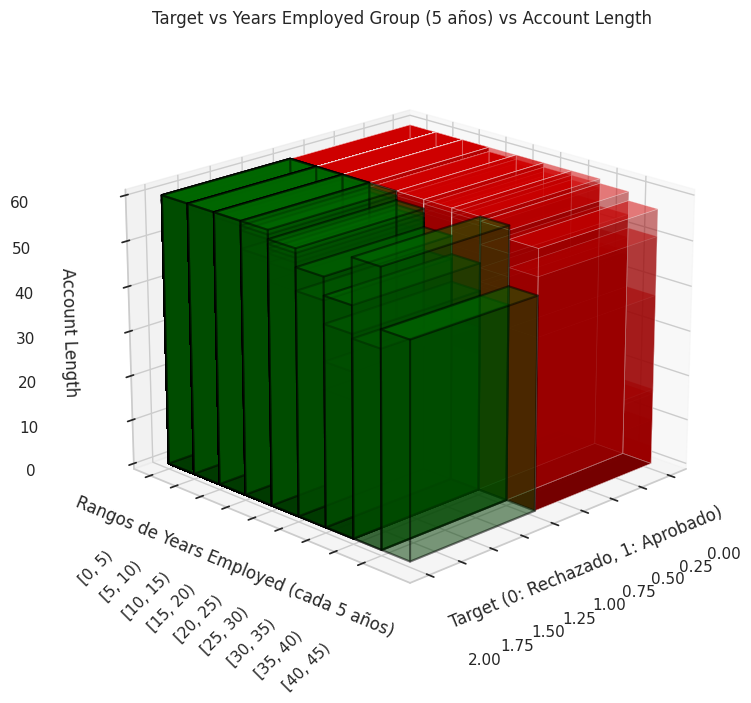

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los límites para los rangos de 5 años
bins = range(0, int(df['Years_employed'].max()) + 5, 5)

# Crear una nueva columna agrupada por rangos de años empleados
df['Years_employed_group'] = pd.cut(df['Years_employed'], bins=bins, right=False)

# Convertir los grupos en valores numéricos para el gráfico
df['Years_employed_group_numeric'] = df['Years_employed_group'].cat.codes

# Crear el gráfico 3D con agrupación en rangos de 5 años
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir los datos
x = df['Target']
y = df['Years_employed_group_numeric']  # Usamos los grupos numéricos de años empleados
z = np.zeros(len(df))  # Altura base de las barras (z = 0)
dx = np.ones(len(df))  # Ancho de las barras en el eje x (constante)
dy = np.ones(len(df))  # Profundidad de las barras en el eje y (constante)
dz = df['Account_length']  # La altura de las barras se basa en la longitud de la cuenta

# Colores y grosores para el target
colors = df['Target'].map({0: 'red', 1: 'green'})
edgewidths = df['Target'].map({0: 0.5, 1: 1.5})  # Líneas más gruesas para las barras verdes
edgecolors = df['Target'].map({0: 'white', 1: 'black'})  # Blanco para rojo, negro para verde

# Crear las barras 3D
for i in range(len(df)):
    ax.bar3d(x[i], y[i], z[i], dx[i], dy[i], dz[i],
             color=colors[i],
             alpha=0.3,  # Ajustamos la transparencia
             edgecolor=edgecolors[i],  # Contorno blanco para Target=0, negro para Target=1
             linewidth=edgewidths[i])  # Grosor del contorno

# Etiquetas y título
ax.set_xlabel('Target (0: Rechazado, 1: Aprobado)')
ax.set_ylabel('Rangos de Years Employed (cada 5 años)')
ax.set_zlabel('Account Length')
ax.set_title('Target vs Years Employed Group (5 años) vs Account Length')

# Rotación del gráfico
ax.view_init(elev=20, azim=45)

# Ajustar las etiquetas en el eje Y para mostrar los rangos de años
ax.set_yticks(df['Years_employed_group_numeric'].unique())
ax.set_yticklabels(df['Years_employed_group'].unique(), rotation=45)

# Ajustar los ticks del eje Y para que haya más espacio entre las etiquetas
ax.tick_params(axis='y', pad=35)  # Incrementa la separación de las etiquetas en el eje Y
ax.tick_params(axis='x', pad=35)  # Ajusta también el eje X si es necesario
ax.tick_params(axis='z', pad=35)  # Incrementa la separación de las etiquetas en el eje Z

# Mostrar el gráfico
plt.show()

#Insights del gráfico 3D barras (EDA):


El gráfico 3D nos ilustra la estabilidad laboral, representada por los "Años de Empleo", como un factor importante en la aprobación de tarjetas de crédito.

A medida que aumenta el rango de años de empleo, la altura de las barras verdes (solicitudes aprobadas) se mantiene estable respecto a las solicitudes rechazadas, presentando un disminución a partir de los 20 a 35 años con un pico entre los 35 a 40 años de estabilidad laboral, se podría sumar un nueva variable como edad y tipo de cargo para llegar a nuevas conclusiones.

 Esto sugiere que la combinación de estabilidad laboral y un historial bancario establecido es un indicador para la aprobación de crédito. En cambio, para los solicitantes rechazados, la relación entre años de empleo y antigüedad de la cuenta es menos clara, lo que implica que otros factores podrían estar influyendo en la decisión en estos casos.

**Conclusión de la H5: La duración de la cuenta bancaria y los años de empleo tendrán una correlación positiva con la elegibilidad para una tarjeta de crédito, reflejando una mayor estabilidad financiera y menor riesgo de incumplimiento.**

La estabilidad laboral es un factor en la aprobación de tarjetas de crédito. Cuanto más tiempo haya estado empleado un solicitante, deberían ser mayores sus posibilidades de obtener la aprobación.
La antigüedad de la cuenta bancaria reforzaría la estabilidad laboral. Un historial bancario largo, combinado con un empleo estable, aumentaría aún más las probabilidades de aprobación.


**Priorizar la estabilidad laboral:**

Las instituciones financieras deberían dar un peso significativo a la estabilidad laboral al evaluar las solicitudes de tarjetas de crédito.

Considerar la antigüedad de la cuenta bancaria: Si bien no es el único factor determinante, un historial bancario largo puede ser un indicador positivo de responsabilidad financiera.

**Recomendaciones:**

Después de la comprobación de estas hipótesis, temas como años de empleo, edad, estado civil parecen ser el rumbo a tomar, incluiremos otras variables, cuales han sido indagadas y verificadas con distintas entidades bancarias, para ajustar el modelo hacia la aprobación, junto con la combinación de nuevas variables que sumadas al analisis EDA nos permitiran identificar los patrones en la aprobación de tarjeta de crédito.
Para cerrar este EDA desarrollaremos una grafico Pair Plot para analizar distintas variables, buscando identificar las varible mas predominantes dentro del data set teniendo como indetificador variables "taget" aprobación '1' y rechazo '0'.



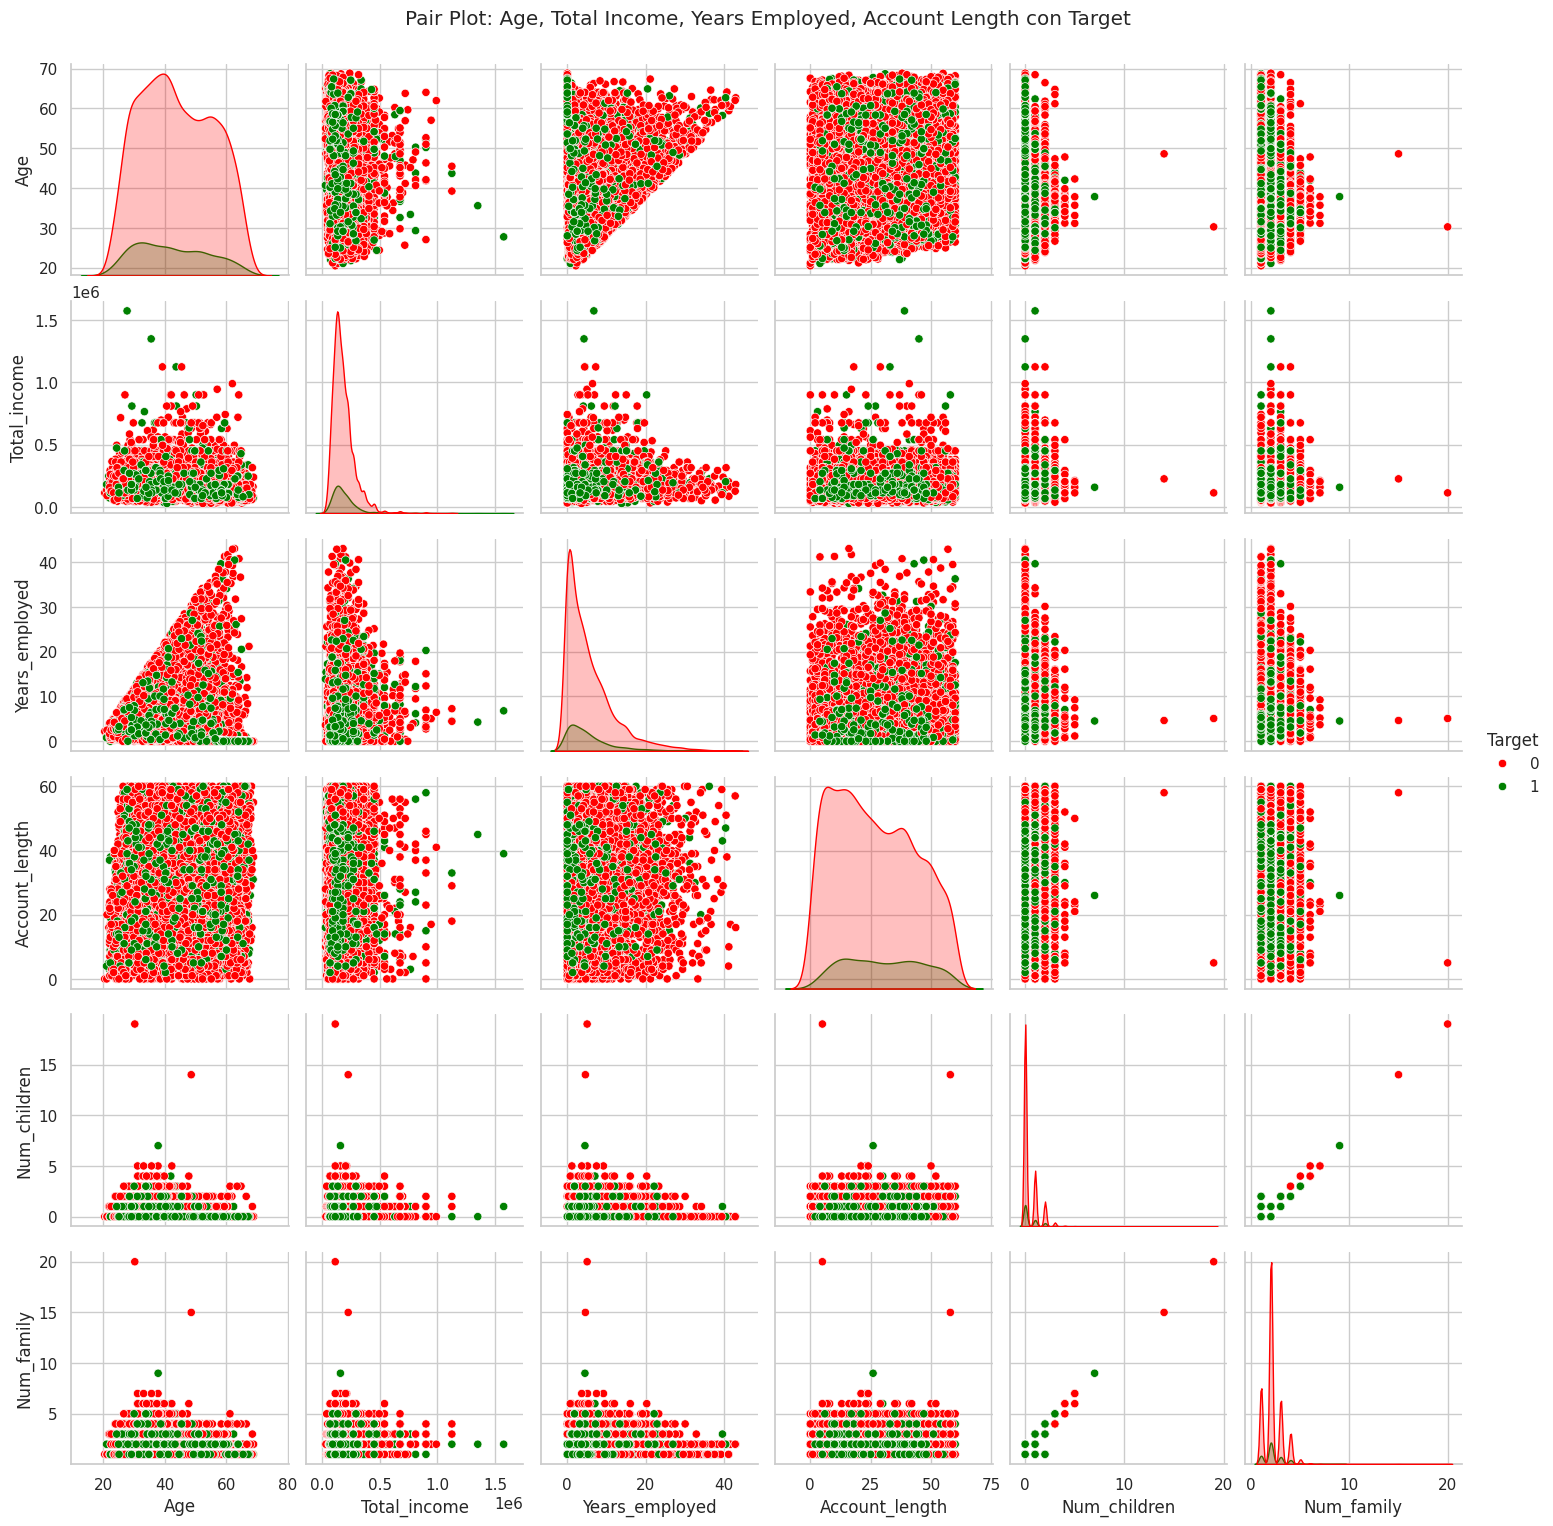

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# df['Age'], df['Total_income'], df['Years_employed'], df['Account_length'],


# Definir una paleta de colores para el target
palette = {0: 'red', 1: 'green'}

# Crear el pairplot
sns.pairplot(
    df,
    vars=['Age', 'Total_income', 'Years_employed', 'Account_length','Num_children','Num_family'],
    hue='Target',
  palette={0: 'red', 1: 'green'})

# Añadir etiquetas de título al gráfico
plt.suptitle('Pair Plot: Age, Total Income, Years Employed, Account Length con Target', y=1.02)

# Mostrar el gráfico
plt.show()



# Insigths del grafico PairPlot (EDA)

**Relaciones entre variables y Target:**

El análisis del gráfico revela varias relaciones interesantes asociadas a las solicitudes aprobadas (puntos verdes), que nos brindan insights valiosos:

Edad e Ingresos: Observamos una concentración de aprobaciones entre solicitantes de 25 a 35 años con ingresos anuales entre 20k y 40k USD. Este grupo demográfico específico podría ser un segmento clave para evaluar con mayor detalle.

Edad y Número de Hijos:  Entre los solicitantes de 25 a 30 años, aquellos con menos de 3 hijos tienden a tener una mayor probabilidad de aprobación. Este hallazgo sugiere que el tamaño de la familia podría ser un factor a considerar en la evaluación crediticia.

Ingresos y Años de Empleo:  Identificamos una concentración de aprobaciones en solicitantes con 5 a 10 años de experiencia laboral e ingresos anuales inferiores a 50k USD. Esto podría indicar que la estabilidad laboral, incluso con ingresos moderados, es valorada positivamente.

Antigüedad de la Cuenta y Número de Hijos:  Los solicitantes con cuentas bancarias de más de 25 años de antigüedad tienden a tener más de un hijo. Este patrón podría estar relacionado con factores socioeconómicos o demográficos que vale la pena investigar.

Tamaño de la Familia y Edad:  Las personas aprobadas tienden a mantener un núcleo familiar de entre 2 y 4 miembros. Esto sugiere que el tamaño de la familia podría ser un factor relevante en la evaluación de la capacidad de pago.

**Otras Conclusiones:**

*Variables Clave:* Los ingresos y los años de empleo emergen como los predictores destacados dentro de esta grafica, para la aprobación de tarjetas de crédito en este conjunto de datos.
Importancia de la Antigüedad de la Cuenta: La duración de la relación bancaria también parece influir positivamente en la aprobación, especialmente cuando se combina con una trayectoria laboral estable se (Ingenieria de atributos).
Edad como Factor Secundario: La edad, por sí sola, no parece ser un factor determinante en la aprobación.

*Análisis Multifactorial:* Es fundamental considerar las interacciones entre las variables y explorar otros factores, como la ocupación y el tipo de ingreso, para construir un modelo predictivo más completo y preciso.

#Que sigue...

En la siguiente etapa de nuestro análisis, crearemos nuevas variables a partir de las partes relevantes del data set como parte de la ingenieria de atributos, encaminado a la aprobación de tarjetas de crédito. Sin embargo, es importante recordar que, como se evidenció en el análisis inicial de los metadatos, existe un fuerte desbalance en el conjunto de datos especialmente en el 'Target', con solo un 13.21% de solicitudes aprobadas.

Este desbalance afectara el rendimiento de los modelos predictivos, ya que tienden a favorecer la clase mayoritaria (rechazos) y pueden tener dificultades para identificar patrones en la clase minoritaria (aprobaciones).


#4. Ingenieria de atributos

**Empecemos con la detención y eliminación de outliers en las  columnas numéricas:**

Como nuestro dataset tiene una carga muy sesgada a la no aprobación de tarjetas de credito usaremos percentil 99 para infentificar y eliminar los valores que pueden distorcionar los resultados al momento de generar el modelo,

*¿Por qué se utiliza el percentil 99?*

El percentil 99 es un umbral común para identificar outliers. Significa que el 99% de los datos están por debajo de este valor y solo el 1% está por encima. Al utilizar este umbral, se pueden identificar valores extremos que podrían ser errores o anomalías




In [28]:
# Importación de bibliotecas
import pandas as pd
import numpy as np

# URL del dataset
url = "https://raw.githubusercontent.com/Jartorias/DSII_61115_Coderhouse/main/credit_card_eligibility.csv"

# Cargar el dataset desde la URL
data = pd.read_csv(url)

# Función para contar outliers en base al percentil 99
def count_outliers(df):
    # Selección de columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers = {}
    # Cálculo del límite superior (percentil 99) para cada columna numérica
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        # Contabilización de outliers en cada columna
        outliers[col] = (df[col] > upper_limit).sum()
    return outliers

# Aplicación de la función excluyendo la columna 'ID'
outliers_count = count_outliers(data.drop(columns='ID'))

# Impresión de los resultados
print("Outliers count based on the 99th percentile:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")


Outliers count based on the 99th percentile:
Gender: 0
Own_car: 0
Own_property: 0
Work_phone: 0
Phone: 0
Email: 0
Unemployed: 0
Num_children: 26
Num_family: 25
Account_length: 0
Total_income: 78
Age: 98
Years_employed: 98
Target: 0


*Hallazgos en la detención de outliers*

"El análisis de outliers ha identificado valores atípicos en las variables numéricas relacionadas con el tamaño familiar (Num_children, Num_family), el ingreso (Total_income), la edad (Age) y los años de empleo (Years_employed). Estos hallazgos sugieren la presencia de una heterogeneidad significativa en estos aspectos entre los solicitantes. En contraste, las variables binarias y la variable objetivo no presentan outliers salvo por que esta ultima es la que contiene la suma de combinatorias para otorgar las tarjetas y presenta un desbalanceo hacia la 'No aprobación'."

In [29]:
# Función para remover outliers en el percentil 99
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        df = df[df[col] <= upper_limit]
    return df

# Remover outliers
df_cleaned = remove_outliers(data.drop(columns='ID'))

# Imprimir la forma del dataset original y del dataset limpio
print("Original dataset shape:", data.drop(columns='ID').shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (9709, 19)
Cleaned dataset shape: (9412, 19)


Con el fin de mejorar la calidad de los análisis, se ha procedido a eliminar el 3.05% de los datos (297 registros) que se identificaron como valores atípicos. Esto garantiza que el conjunto de datos final sea más representativo y confiable.

In [30]:
df = df_cleaned

# Mostrar las primeras filas del dataset
df.head()

# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9412 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9412 non-null   int64  
 1   Own_car          9412 non-null   int64  
 2   Own_property     9412 non-null   int64  
 3   Work_phone       9412 non-null   int64  
 4   Phone            9412 non-null   int64  
 5   Email            9412 non-null   int64  
 6   Unemployed       9412 non-null   int64  
 7   Num_children     9412 non-null   int64  
 8   Num_family       9412 non-null   int64  
 9   Account_length   9412 non-null   int64  
 10  Total_income     9412 non-null   float64
 11  Age              9412 non-null   float64
 12  Years_employed   9412 non-null   float64
 13  Income_type      9412 non-null   object 
 14  Education_type   9412 non-null   object 
 15  Family_status    9412 non-null   object 
 16  Housing_type     9412 non-null   object 
 17  Occupation_type  94


#Una vez procesado el conjunto de datos, eliminando los outliers mediante el percentil 99...

procederemos a explorar visualmente las relaciones entre las variables. Nos centraremos en las variables numéricas y binarias para identificar posibles correlaciones.

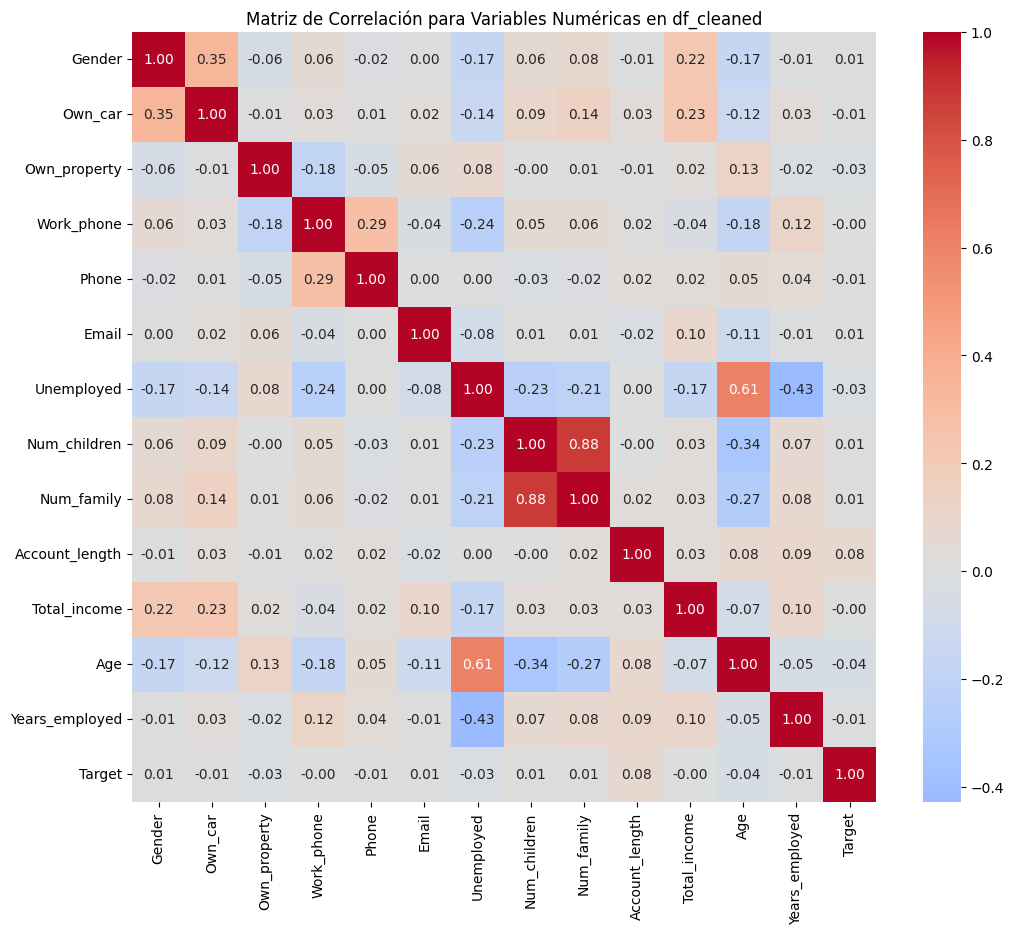

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación solo con variables numéricas en df_cleaned
corr = df_cleaned.select_dtypes(include=['int64', 'float64']).corr()

# Mostrar la matriz de correlación
corr

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear y mostrar la matriz de calor
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de Correlación para Variables Numéricas en df_cleaned")
plt.show()

Para realizar un análisis más granular, procederemos a segmentar el conjunto de datos en función de la variable objetivo. Nos centraremos en el subconjunto donde "target" es igual a 1 (aprobados), lo cual representa aproximadamente el 12% del total de observaciones. A través de este enfoque, exploraremos si existen correlaciones específicas entre las variables que puedan explicar el comportamiento de las aprobaciones

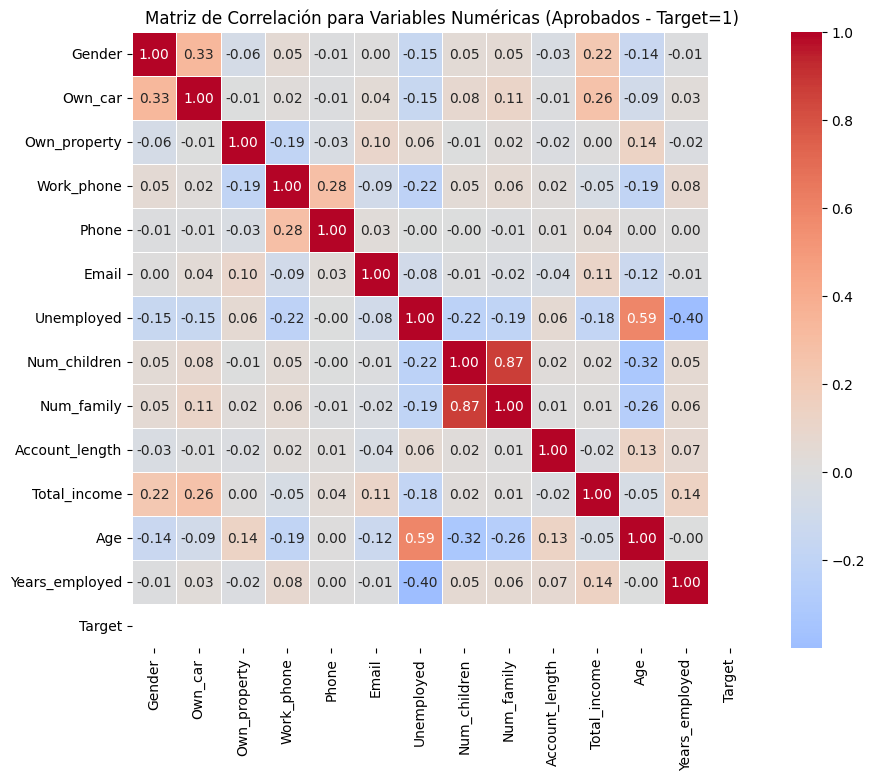

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo los datos donde Target = 1
approved_data = df_cleaned[df_cleaned['Target'] == 1]

# Calcular la matriz de correlación solo para variables numéricas
corr_approved = approved_data.select_dtypes(include=['int64', 'float64']).corr()

# Visualizar la matriz de correlación mediante un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_approved, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación para Variables Numéricas (Aprobados - Target=1)")
plt.show()

Al filtrar los datos para incluir únicamente a los solicitantes aprobados **('Target'=1)**, observamos una ligera disminución en la correlación entre las variables 'Edad' y 'Desempleado' (2% menos), así como entre 'Número de familiares' y 'Número de hijos' (1% menos). Si bien se detectaron aumentos en otras correlaciones, estos no fueron lo suficientemente significativos para destacarlos. por lo tanto, buscaremos nuevas variables combinando la existentes

#A tener en cuenta

Para enriquecer nuestro conjunto de datos, utilizaremos técnicas de ingeniería de atributos. En este caso, aplicaremos label encoding y one-hot encoding a las variables categóricas. Posteriormente, crearemos nuevas variables numéricas a partir de la combinación de estas variables transformadas con las variables numéricas originales.



In [37]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd


# Copia del dataframe original
df = df_cleaned.copy()

# Codificación de variables categóricas como antes
label_cols = ['Education_type', 'Family_status', 'Housing_type', 'Income_type']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Crear la variable binaria para identificar a las personas actualmente empleadas (Unemployed = 0)
df['currently_employed'] = df['Unemployed'].apply(lambda x: 1 if x == 0 else 0)

# Crear variables numéricas con filtro de personas empleadas
# Ingreso por año de experiencia laboral (si el solicitante está empleado)
df['income_per_year_employed'] = df.apply(lambda x: (x['Total_income'] / x['Years_employed'])
                                          if x['Years_employed'] > 0 and x['currently_employed'] == 1 else 0, axis=1)

# Ingreso dividido por edad (solo para empleados)
df['income_per_age'] = df.apply(lambda x: (x['Total_income'] / x['Age'])
                                if x['Age'] > 0 and x['currently_employed'] == 1 else 0, axis=1)

# Relación entre años de empleo y la duración de la cuenta (solo para empleados)
df['employment_account_ratio'] = df.apply(lambda x: (x['Years_employed'] / x['Account_length'])
                                          if x['Account_length'] > 0 and x['currently_employed'] == 1 else 0, axis=1)

# Separar características y variable objetivo
X = df.drop(columns='Target')
y = df['Target']

# Convertir variables categóricas adicionales en columnas binarias (OneHotEncoding)
X = pd.get_dummies(X, drop_first=True)

# Balanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el nuevo balance de clases
print("Distribución de clases antes del balanceo:", y.value_counts())
print("Distribución de clases después del balanceo:", y_resampled.value_counts())


Distribución de clases antes del balanceo: Target
0    8170
1    1242
Name: count, dtype: int64
Distribución de clases después del balanceo: Target
1    8170
0    8170
Name: count, dtype: int64


#Aplicación de SMOTE para balancear clases en el conjunto de datos

Comencemos explicando el último paso del proceso, donde se aplicó la técnica SMOTE para balancear las clases.

La variable objetivo **'Target'** presenta un fuerte sesgo hacia la clase 'No Aprobados (0)', lo que significa que hay muchos más ejemplos de esta categoría en comparación con la clase 'Aprobados (1)'. Este desequilibrio dificulta el aprendizaje del modelo de machine learning, ya que tiende a favorecer la clase mayoritaria y puede tener dificultades para identificar correctamente los casos de 'Aprobados (1)'.

Al aplicar la técnica de sobremuestreo **SMOTE**, se generaron nuevos ejemplos sintéticos de la clase minoritaria 'Aprobados (1)', equilibrando así el conjunto de datos. Esto permitió que el modelo se entrene de manera más equitativa, mejorando su capacidad para predecir correctamente tanto las aprobaciones como las no aprobaciones.

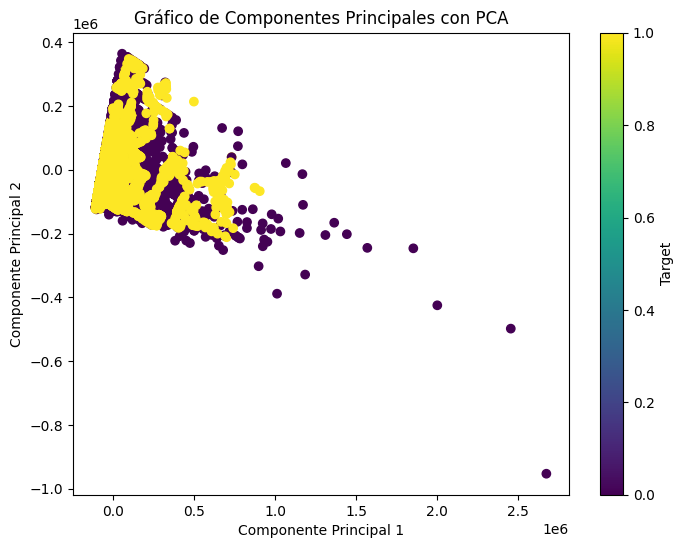

In [43]:
# Se genera un grafico con los nuevos componente con pca

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Realizar PCA con 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_resampled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Agregar la variable objetivo al DataFrame
principal_df['Target'] = y_resampled

# Graficar los componentes principales con colores diferentes para cada clase
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Target'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Componentes Principales con PCA')
plt.colorbar(label='Target')
plt.show()

Los puntos parecen agruparse en dos regiones principales, una asociada con el color púrpura y otra con el amarillo. Sin embargo encontramos cierta superposición entre los grupos, lo que indica que la separación entre las clases no es perfecta. un problema comun de clasificación, especialmente cuando hay características que hacen que las clases se superpongan sobre todo cuando fueron creadas sinteticamete con SMOTE.
Variable objetivo: El color del punto nos indica a qué clase pertenece cada observación. Al comparar la distribución de colores en el gráfico con la distribución de clases antes y después del balanceo, podemos inferir que el color púrpura **clase 0** pertenece a la clase mayoritaria antes del balanceo y el color amarillo a la **clase 1** pertenece a la clase minoritaria, la cual fue construida sinteticamente.

#Ahora vamos a validar nuestra ingenieria de atributos

In [44]:
# Generamos un gráfico de pair plot con las variables creadas en el anterior código y otro con histogramas con las transformaciones categóricas, este último identificando la variable 'Unemployed'

import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot para las variables numéricas y Target
sns.pairplot(df,
             vars=['Age', 'Total_income', 'Years_employed', 'Account_length', 'Num_children', 'Num_family',
                   'income_per_year_employed', 'income_per_age', 'employment_account_ratio'],
             hue='Target', palette={0: 'red', 1: 'green'})
plt.suptitle('Pair Plot: Variables numéricas con Target', y=1.02)
plt.show()

# Histogramas para las variables categóricas, identificando la variable 'Unemployed'
for column in ['Education_type', 'Family_status', 'Housing_type', 'Income_type', 'Unemployed']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, hue='Unemployed', multiple='stack', kde=True)
    plt.title(f'Histograma de {column} con Unemployed')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

#Al eliminar outliers se uso pairplot para validar nuevamente el comportamiento de las variables numericas existentes y las que fueron creadas creadas bajo la etapa 4...

Edad y experiencia laboral: Existe una concentración de aprobaciones entre personas de 25 a 35 años con menos de 5 años de experiencia, especialmente en rangos salariales menores a 200k USD.
Ingreso y experiencia: Los ingresos tienden a ser estables desde el inicio de la carrera laboral, sugiriendo poca movilidad salarial y una mayor permanencia en los empleos.

Ingreso por edad: A mayor edad, generalmente hay mayores ingresos, lo cual es esperable debido a la acumulación de experiencia. Sin embargo, la mayoría de las aprobaciones se concentran en ingresos menores a 200k USD y una relación ingreso-edad promedio de 5000 USD.

Antigüedad laboral y cuentas bancarias: Existe una alta correlación entre los años de empleo y la duración de la cuenta bancaria, indicando una gran lealtad de los clientes hacia sus instituciones financieras. La mayoría de las aprobaciones se concentran en personas con menos de 10 años de experiencia laboral.

En resumen, el análisis sugiere que las personas con una trayectoria laboral estable, ingresos moderados y una relación bancaria de larga duración tienen mayores probabilidades de obtener la aprobación de una tarjeta de crédito. Los jóvenes profesionales con experiencia laboral reciente y salarios competitivos también representan un segmento importante de aprobaciones.

#Hallazgos en los histogramas...

Con el objetivo de evaluar el efecto de la variable "unemployed" sobre la distribución de las nuevas variables categóricas codificadas, realizamos un análisis exploratorio. Los resultados obtenidos corroboran los hallazgos de la sección 3.2, donde se identificó una alta proporción de individuos empleados en el conjunto de datos. Al analizar los histogramas, se observa una clara tendencia hacia la categoría "unemployed=0" (empleado) en la mayoría de las combinaciones de variables, lo que sugiere una fuerte segmentación en los datos basada en el estado de empleo.


# 5 Entrenamiento y testeo

Para abordar el problema de clasificación binaria planteado al inicio del notebook, donde se busca predecir si una solicitud será aprobada o rechazada en función de un conjunto de características, se ha seleccionado un enfoque de aprendizaje **supervisado.** Al tratarse de etiquetas los algoritmos seleccionados seran de clasifiacion.

 El conjunto de datos utilizado para entrenar el modelo ha sido cuidadosamente preparado, eliminando valores atípicos y aplicando la técnica SMOTE para corregir el desbalance de clases.

Esta última técnica resultó fundamental dado que la clase "no aprobado" estaba sobrerrepresentada en los datos originales. Al balancear las clases, se garantiza que el modelo aprenda a identificar las características distintivas de ambas clases de manera más equitativa.

*5.1. Experimentemos un poco:*

Con el objetivo de establecer un punto de referencia para comparar los resultados posteriores, se entrenará un modelo de Random Forest utilizando los datos sin aplicar ninguna transformación, como la eliminación de outliers mediante el percentil 99, el sobremuestreo con SMOTE o la conversión de variables.



Matriz de confusión:
[[1682    3]
 [ 255    2]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1685
           1       0.40      0.01      0.02       257

    accuracy                           0.87      1942
   macro avg       0.63      0.50      0.47      1942
weighted avg       0.81      0.87      0.81      1942



<ipython-input-48-cdc1f1ffe897>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette="viridis")


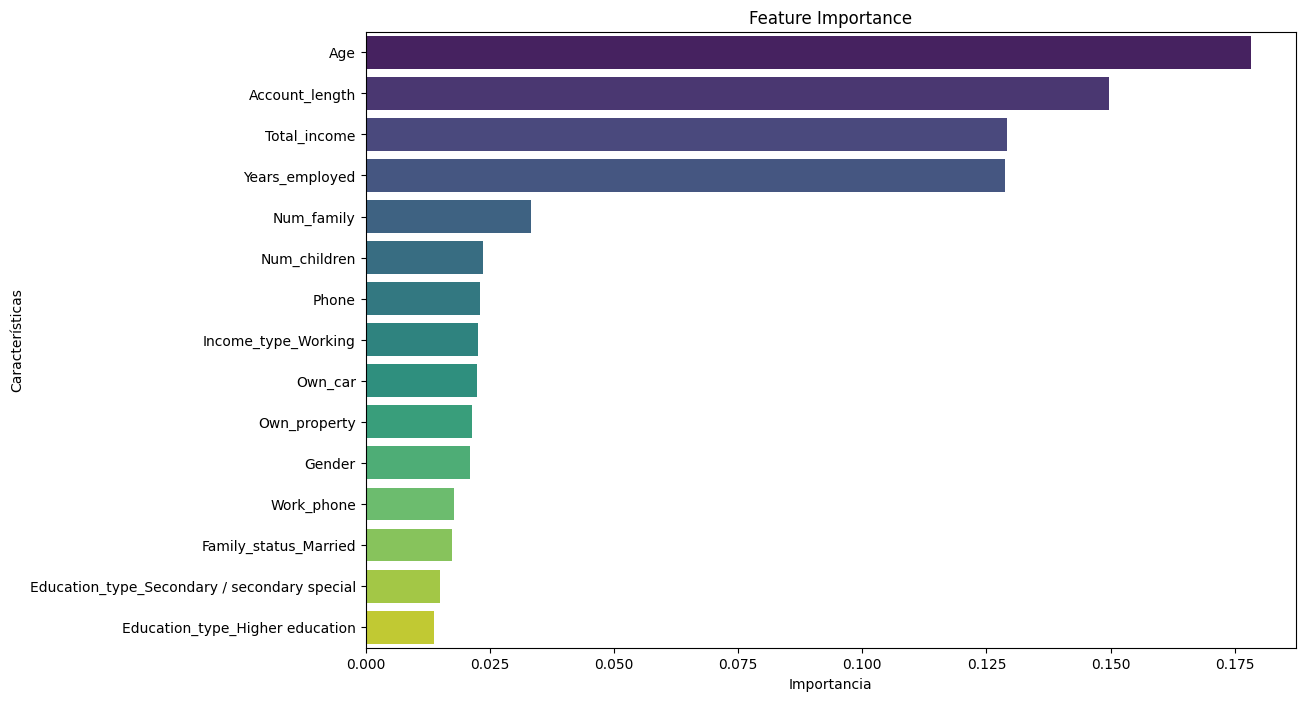

                                         Feature  Importance
11                                           Age    0.178315
9                                 Account_length    0.149680
10                                  Total_income    0.129103
12                                Years_employed    0.128740
8                                     Num_family    0.033257
7                                   Num_children    0.023586
4                                          Phone    0.022992
16                           Income_type_Working    0.022555
1                                        Own_car    0.022356
2                                   Own_property    0.021479
0                                         Gender    0.021111
3                                     Work_phone    0.017814
21                         Family_status_Married    0.017330
20  Education_type_Secondary / secondary special    0.014982
17               Education_type_Higher education    0.013690


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# URL del dataset
url = "https://raw.githubusercontent.com/Jartorias/DSII_61115_Coderhouse/main/credit_card_eligibility.csv"

# Cargar el dataset usando pandas
df = pd.read_csv(url, delimiter=",", encoding="ISO-8859-1")

# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['Target', 'ID'])
y = df['Target']

# Convertir variables categóricas a formato numérico usando OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Crear un DataFrame con las importancias de las características y sus nombres
importances = rf_model.feature_importances_
features_names = X_train.columns
importance_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Ordenar por importancia

# Visualizar la importancia de las características con color
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette="viridis")
plt.title('Feature Importance')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

# Analizando un top 15 de características
top_features = importance_df.head(15)
print(top_features)


Los resultados obtenidos de nuestro experimento indican un alto valor de **exactitud (0.87)**, sin embargo, este valor puede ser engañoso debido al desbalance de clases. Al analizar las métricas macro y ponderada de precisión, se observa un bajo desempeño en la predicción de la aprobaciones (0.63). Esto sugiere que el modelo, si bien es efectivo para identificar casos no aprobados, presenta dificultades para detectar correctamente los casos aprobados

Por otro lado la **importancia** refleja cómo el modelo usa la información para diferenciar entre aprobados y no aprobados. Las características financieras y de estabilidad (como ingresos, duración de la cuenta, y empleo) son claves, mientras que otras, como el estado civil o el tipo de educación, tienen menos influencia en la decisión de aprobación.

*5.2 Etapa de Modelado:*

En esta sección, procederemos a entrenar un modelo de clasificación utilizando el algoritmo **Random Forest.** Como entrada al modelo, utilizaremos el conjunto de datos que ha sido previamente preprocesado para eliminar los valores atípicos y balancear las clases a través de la técnica **SMOTE.**

Matriz de confusión:
[[1556   78]
 [ 240 1394]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1634
           1       0.95      0.85      0.90      1634

    accuracy                           0.90      3268
   macro avg       0.91      0.90      0.90      3268
weighted avg       0.91      0.90      0.90      3268



<ipython-input-47-317c67ea9206>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette="viridis")  # Cambiar "viridis" por cualquier otra paleta


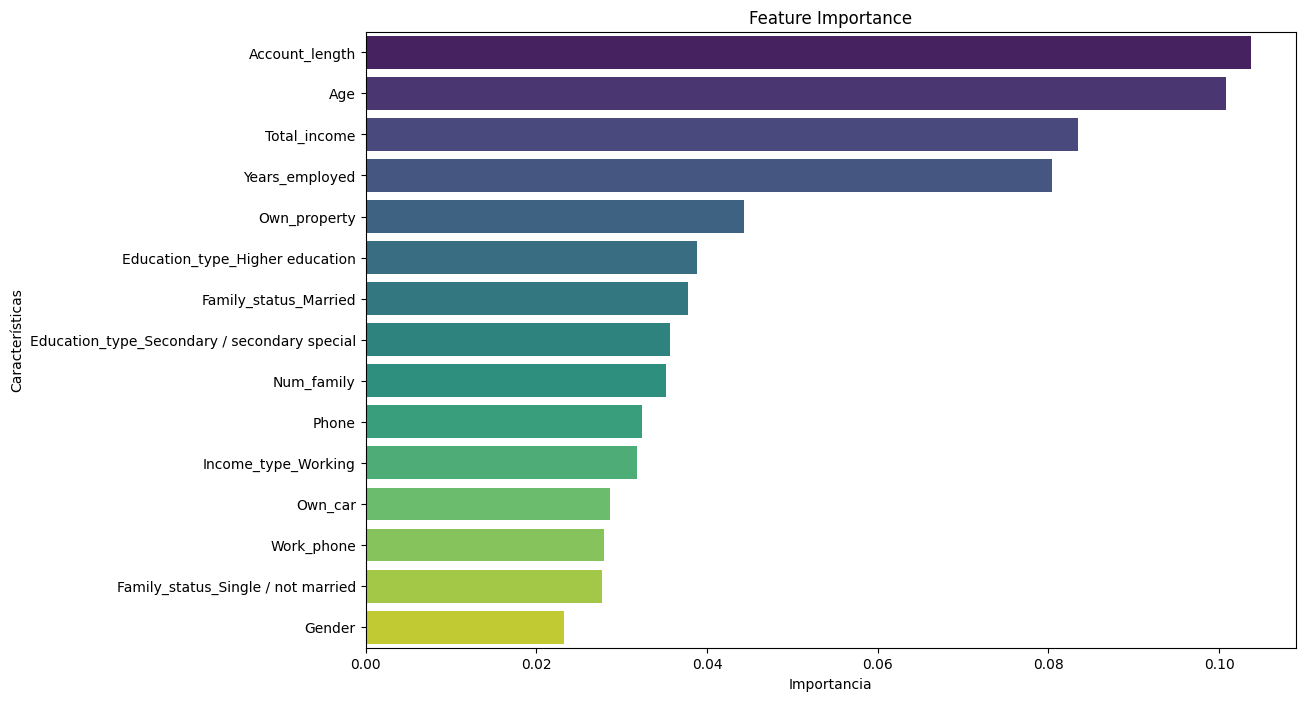

                                         Feature  Importance
9                                 Account_length    0.103754
11                                           Age    0.100823
10                                  Total_income    0.083447
12                                Years_employed    0.080441
2                                   Own_property    0.044311
17               Education_type_Higher education    0.038875
21                         Family_status_Married    0.037797
20  Education_type_Secondary / secondary special    0.035675
8                                     Num_family    0.035149
4                                          Phone    0.032425
16                           Income_type_Working    0.031777
1                                        Own_car    0.028595
3                                     Work_phone    0.027935
23            Family_status_Single / not married    0.027689
0                                         Gender    0.023281


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Apartir del DataFrame `df_cleaned`
df = df_cleaned.copy()  # Usar el dataset limpio

# Separar características (X) y variable objetivo (y)
# Removing 'ID' from the list of columns to drop since it might not be present
X = df.drop(columns=['Target'])
y = df['Target']

# Convertir variables categóricas a formato numérico usando OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# ... (Rest of the code remains the same)

# Balanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir el conjunto de datos balanceado en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Inicializar el modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Crear un DataFrame con las importancias de las características y sus nombres
importances = rf_model.feature_importances_
features_names = X_train.columns
importance_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Ordenar por importancia

# Visualizar la importancia de las características con color
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette="viridis")  # Cambiar "viridis" por cualquier otra paleta
plt.title('Feature Importance')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

# Analizando un top 15 de características
top_features = importance_df.head(15)
print(top_features)


La matriz de confusión muestra que el modelo es altamente preciso en la identificación de casos no elegibles (clase 0), con una precisión y recall superiores a 0.90. Sin embargo, en el caso de los elegibles (clase 1), aunque la precisión es alta (0.95), el recall es ligeramente inferior (0.85). Esto implica que, si bien el modelo es muy bueno para identificar a los candidatos que definitivamente no cumplen los criterios, podría estar rechazando a algunos candidatos que sí los cumplen.


Por otro lado la **importancia** en las características relacionadas con la estabilidad financiera y personal (duración de cuenta, edad, ingresos, años de empleo, posesión de propiedad) son las que más impactan en el modelo, lo cual es coherente con los criterios de evaluación crediticia.

Los resultados evidencian que el preprocesamiento de los datos, incluyendo el tratamiento de outliers y la creación de nuevas variables, ha tenido un impacto positivo en el rendimiento del modelo, especialmente en la detección de la clase minoritaria. El modelo mejorado logró una **precisión del 45%** y un **F1-score superior al 80%** para esta clase.

A continuacion utilizaremos **Stratified K-Fold** que es una variante de K-Fold es especialmente útil cuando se tiene un conjunto de datos desbalanceado, como es en este caso, donde la variable objetivo 'Target' aprobación/rechazo tiene un sesgo mayor hacia el rechazo de tarjetas...

Accuracy promedio en validación cruzada: 0.8444535620742218
Matriz de confusión:
[[1556   78]
 [ 240 1394]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1634
           1       0.95      0.85      0.90      1634

    accuracy                           0.90      3268
   macro avg       0.91      0.90      0.90      3268
weighted avg       0.91      0.90      0.90      3268



<ipython-input-49-1635c37767a6>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette="viridis")  # Cambiar "viridis" por cualquier otra paleta


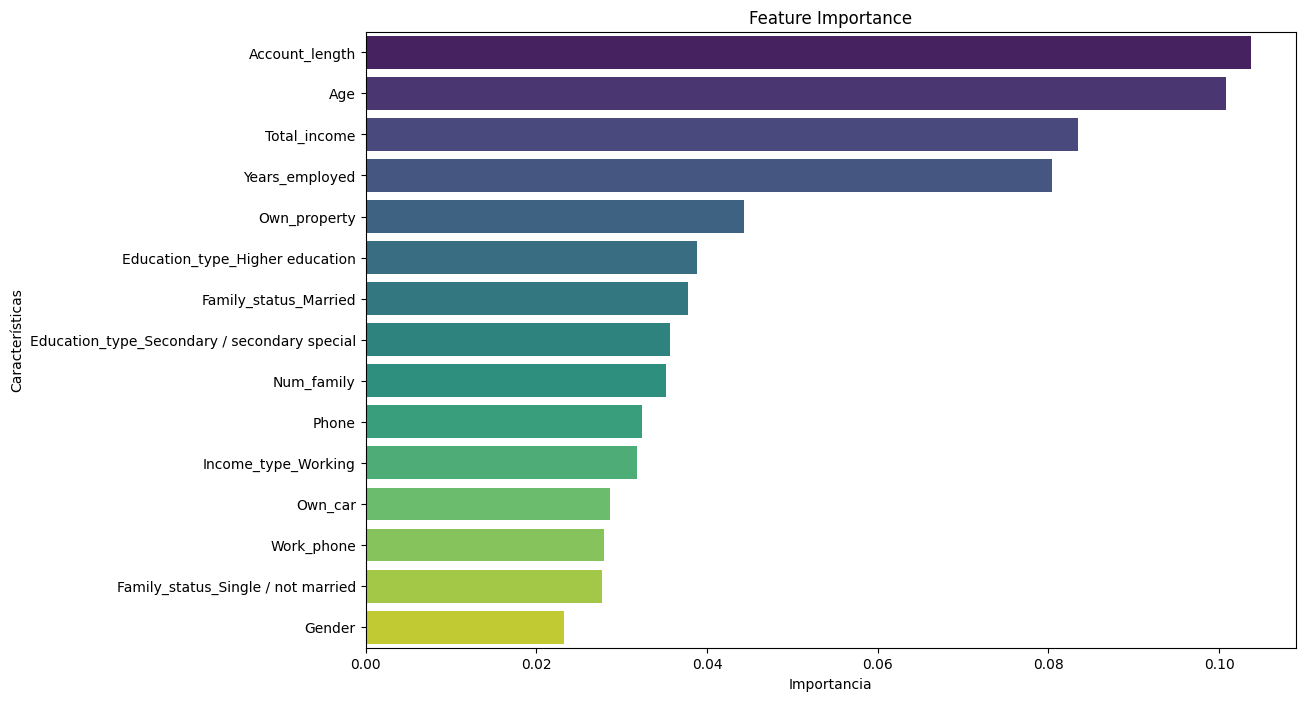

                                         Feature  Importance
9                                 Account_length    0.103754
11                                           Age    0.100823
10                                  Total_income    0.083447
12                                Years_employed    0.080441
2                                   Own_property    0.044311
17               Education_type_Higher education    0.038875
21                         Family_status_Married    0.037797
20  Education_type_Secondary / secondary special    0.035675
8                                     Num_family    0.035149
4                                          Phone    0.032425
16                           Income_type_Working    0.031777
1                                        Own_car    0.028595
3                                     Work_phone    0.027935
23            Family_status_Single / not married    0.027689
0                                         Gender    0.023281


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# A partir del DataFrame `df_cleaned`
df = df_cleaned.copy()  # Usar el dataset limpio

# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Convertir variables categóricas a formato numérico usando OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Inicializar el modelo de RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Inicializa Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Almacenar resultados
accuracy_scores = []

# Validación cruzada con SMOTE
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Aplicar SMOTE solo en el conjunto de entrenamiento
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Entrenar el modelo con los datos de entrenamiento balanceados
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Realizar predicciones en el conjunto de prueba
    y_pred = rf_model.predict(X_test)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Resultado promedio
print(f'Accuracy promedio en validación cruzada: {np.mean(accuracy_scores)}')

# Evaluar el modelo final en el conjunto de prueba utilizando los datos originales
X_resampled, y_resampled = smote.fit_resample(X, y)  # Aplicar SMOTE a todo el dataset para entrenamiento final
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenar el modelo con el conjunto de entrenamiento final
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba final
y_pred_final = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo final
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_final))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred_final))

# Crear un DataFrame con las importancias de las características y sus nombres
importances = rf_model.feature_importances_
features_names = X_train.columns
importance_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Ordenar por importancia

# Visualizar la importancia de las características con color
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette="viridis")  # Cambiar "viridis" por cualquier otra paleta
plt.title('Feature Importance')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

# Analizando un top 15 de características
top_features = importance_df.head(15)
print(top_features)


*5.2.1 Conclusion:*

Después de aplicar Stratified K-Fold, la precisión promedio en validación cruzada fue de 84.4%. Esto puede indicar que el modelo es más generalizable y no está sobreajustado a un único conjunto de datos, lo que es positivo. Sin embargo, también sugiere que el modelo puede no ser tan robusto como se pensaba inicialmente.

Estabilidad del Modelo:
La matriz de confusión y el informe de clasificación se mantuvieron constantes, lo que indica que el modelo está mostrando una capacidad consistente para clasificar los datos, las caracteristicas se mantienen en el mismo orden al ejericio ante de realizar la validación cruzada...